## Based on https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder

import talos
%matplotlib inline

from talos.utils import lr_normalizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten 

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from tensorflow.keras.optimizers import Adam, Nadam, Adamax
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import categorical_crossentropy


In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP',
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

In [5]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [6]:
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test) 

In [7]:
print(X_train.shape, X_test.shape)

(17454, 49) (4364, 49)


### CNN 1st trial


#### Adjusting shape of training data 


In [8]:
X_train.shape

(17454, 49)

In [9]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # LSTM requires a 3D array in the format: (# samples, timesteps, # features)

X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
X_train_cnn.shape

(17454, 49, 1)

#### Model settings

In [11]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(49,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            192       
                                                                 
 dense (Dense)               (None, 48, 16)            1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1540      
                                                                 
Total params: 2,772
Trainable params: 2,772
Non-trainable params: 0
______________________________________________________

In [12]:
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
546/546 [==============================] - 3s 3ms/step - loss: 1.2628 - accuracy: 0.4202
Epoch 2/10
546/546 [==============================] - 2s 3ms/step - loss: 1.2144 - accuracy: 0.4456
Epoch 3/10
546/546 [==============================] - 2s 3ms/step - loss: 1.2017 - accuracy: 0.4535
Epoch 4/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1949 - accuracy: 0.4584
Epoch 5/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1888 - accuracy: 0.4633
Epoch 6/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1857 - accuracy: 0.4665
Epoch 7/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1811 - accuracy: 0.4656
Epoch 8/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1778 - accuracy: 0.4698
Epoch 9/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1785 - accuracy: 0.4675
Epoch 10/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1762 - accuracy: 0.4719

In [13]:
# evaluate model
val_loss, val_acc = model.evaluate(X_test_cnn, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1891 - accuracy: 0.4574


#### Model Evaluation

In [14]:
y_pred = model.predict(X_test_cnn)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.41      0.29      0.34       572
           1       0.33      0.21      0.26      1007
           2       0.31      0.16      0.21      1029
           3       0.52      0.83      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.39      0.37      0.36      4364
weighted avg       0.41      0.46      0.41      4364



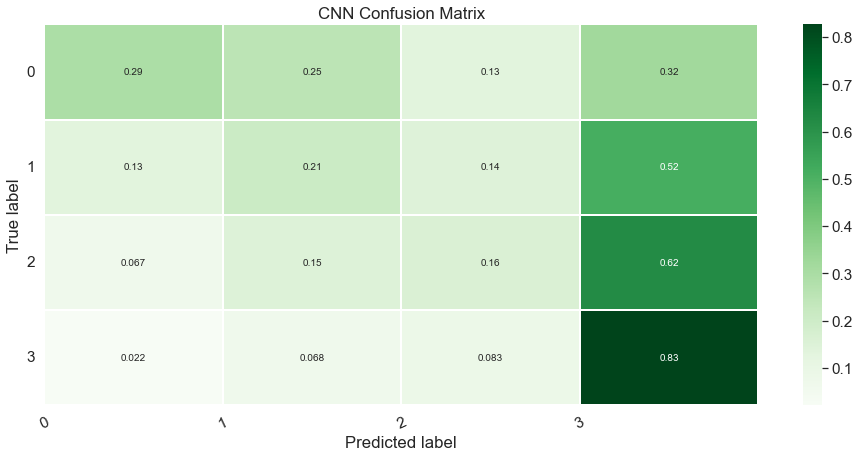

In [15]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('CNN Confusion Matrix')
plt.show()

## Hyperparameter optimization 

#### Preprocessing data

In [16]:
mm = MinMaxScaler(feature_range = (0, 1))  
    # Scale only on training data
mm.fit(data[features])  
x = mm.transform(data[features])  
 

x

array([[1.        , 0.4246951 , 0.        , ..., 0.125     , 0.125     ,
        0.38461538],
       [1.        , 0.45573904, 0.        , ..., 0.79166667, 0.53125   ,
        0.30769231],
       [0.        , 0.4838945 , 0.        , ..., 0.20833333, 0.09375   ,
        0.        ],
       ...,
       [1.        , 0.3085721 , 0.        , ..., 0.625     , 0.75      ,
        0.46153846],
       [1.        , 0.61454747, 0.        , ..., 0.20833333, 0.5       ,
        0.61538462],
       [1.        , 0.55776974, 0.        , ..., 0.08333333, 0.21875   ,
        0.23076923]])

### OneHot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing severoty column (label encoded values of severities)
enc_df = pd.DataFrame(enc.fit_transform(data[['Severity']]).toarray(), index = data.index)
y = enc_df.to_numpy()
y

# the talos example used arrays for x and y, and y was one-hot encoded. 

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [18]:
x = x.reshape(x.shape[0],x.shape[1],1)

In [19]:
model = Sequential()
model.add(Conv1D(100, 4, activation="relu", input_shape=(49,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)



Epoch 1/10
546/546 [==============================] - 3s 4ms/step - loss: 1.2595 - accuracy: 0.4223
Epoch 2/10
546/546 [==============================] - 2s 3ms/step - loss: 1.2176 - accuracy: 0.4459
Epoch 3/10
546/546 [==============================] - 2s 3ms/step - loss: 1.2055 - accuracy: 0.4566
Epoch 4/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1997 - accuracy: 0.4557
Epoch 5/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1925 - accuracy: 0.4625
Epoch 6/10
546/546 [==============================] - 2s 4ms/step - loss: 1.1871 - accuracy: 0.4660
Epoch 7/10
546/546 [==============================] - 3s 5ms/step - loss: 1.1827 - accuracy: 0.4670
Epoch 8/10
546/546 [==============================] - 3s 6ms/step - loss: 1.1798 - accuracy: 0.4672
Epoch 9/10
546/546 [==============================] - 2s 4ms/step - loss: 1.1766 - accuracy: 0.4712
Epoch 10/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1736 - accuracy: 0.4707

In [20]:
val_loss, val_acc = model.evaluate(X_test_cnn, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1880 - accuracy: 0.4590


### Model preparation

In [33]:
def OSA_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(Conv1D(params['filters'],params['kernel_size'], padding = params['padding'],
                    activation=params['first_activation'], input_shape=(49,1)))
    
    model.add(Dense(params['first_neuron'],
                    activation=params['first_activation']))
    
    model.add(MaxPooling1D())
    
    model.add(Flatten())
    
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=1,
                    validation_data=[x_val, y_val])
    
    return out, model

### Parameters

In [34]:
p = {'lr': [0.001, 0.01, 0.1],
     'filters':[25, 50, 70, 100],
     'first_neuron':[16, 32, 64, 128],
     'kernel_size':[2,3,4,10],
     'padding':['valid', 'causal', 'same'],
     'batch_size': [5, 10, 20, 32],
     'epochs': [3],
     'optimizer': [Adam, Nadam, Adamax],
     'loss': ['categorical_crossentropy'],
     'first_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'linear'],
     'second_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'linear'],
     'last_activation': ['softmax']}

### Run the Hyperparameter Scan() 

the documentation for this function is here:
https://github.com/autonomio/talos/blob/master/talos/scan/Scan.py

In [35]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=OSA_model,
                         experiment_name='OSA_hyper_cnn',
                         fraction_limit=.001)
# By defaul, this function uses 70:30 split for training/ validation
#To get started quickly, we're going to invoke the 'grid_downsample' parameter to 1/100 of the entire permutations



  0%|                                                                                          | 0/338 [00:00<?, ?it/s]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3521 - acc: 0.3363 - val_loss: 1.3366 - val_acc: 0.3886
Epoch 2/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3239 - acc: 0.3956 - val_loss: 1.3148 - val_acc: 0.4042
Epoch 3/3
478/478 [==============================] - 6s 13ms/step - loss: 1.3092 - acc: 0.3996 - val_loss: 1.3041 - val_acc: 0.4073


  9%|██████▉                                                                   | 156/1658 [1:20:37<12:56:14, 31.01s/it]


  0%|▏                                                                               | 1/338 [00:17<1:37:22, 17.34s/it]

Epoch 1/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.2525 - acc: 0.4254 - val_loss: 1.2198 - val_acc: 0.4510
Epoch 2/3
3055/3055 [==============================] - 33s 11ms/step - loss: 1.2141 - acc: 0.4499 - val_loss: 1.2060 - val_acc: 0.4597
Epoch 3/3
3055/3055 [==============================] - 33s 11ms/step - loss: 1.2020 - acc: 0.4552 - val_loss: 1.1983 - val_acc: 0.4641




  1%|▍                                                                               | 2/338 [01:58<6:11:33, 66.35s/it]

Epoch 1/3
764/764 [==============================] - 11s 14ms/step - loss: 1.2860 - acc: 0.4013 - val_loss: 1.2524 - val_acc: 0.4308
Epoch 2/3
764/764 [==============================] - 11s 14ms/step - loss: 1.2401 - acc: 0.4352 - val_loss: 1.2339 - val_acc: 0.4432
Epoch 3/3
764/764 [==============================] - 12s 15ms/step - loss: 1.2236 - acc: 0.4407 - val_loss: 1.2205 - val_acc: 0.4487




  1%|▋                                                                               | 3/338 [02:32<4:49:55, 51.93s/it]

Epoch 1/3
478/478 [==============================] - 12s 20ms/step - loss: 1.3144 - acc: 0.3948 - val_loss: 1.2882 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 9s 19ms/step - loss: 1.2813 - acc: 0.4012 - val_loss: 1.2723 - val_acc: 0.4091
Epoch 3/3
478/478 [==============================] - 8s 18ms/step - loss: 1.2669 - acc: 0.4074 - val_loss: 1.2603 - val_acc: 0.4183




  1%|▉                                                                               | 4/338 [03:03<4:01:25, 43.37s/it]

Epoch 1/3
1528/1528 [==============================] - 18s 11ms/step - loss: 1.3042 - acc: 0.3984 - val_loss: 1.2805 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 16s 10ms/step - loss: 1.2752 - acc: 0.4037 - val_loss: 1.2642 - val_acc: 0.4122
Epoch 3/3
1528/1528 [==============================] - 15s 10ms/step - loss: 1.2605 - acc: 0.4132 - val_loss: 1.2521 - val_acc: 0.4296




  1%|█▏                                                                              | 5/338 [03:53<4:14:05, 45.78s/it]

Epoch 1/3
764/764 [==============================] - 14s 16ms/step - loss: 1.3250 - acc: 0.3984 - val_loss: 1.3319 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 15s 20ms/step - loss: 1.3239 - acc: 0.3944 - val_loss: 1.3153 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 14s 18ms/step - loss: 1.3249 - acc: 0.3960 - val_loss: 1.3370 - val_acc: 0.4071




  2%|█▍                                                                              | 6/338 [04:36<4:09:19, 45.06s/it]

Epoch 1/3
764/764 [==============================] - 9s 10ms/step - loss: 1.3753 - acc: 0.3422 - val_loss: 1.3450 - val_acc: 0.4068
Epoch 2/3
764/764 [==============================] - 9s 11ms/step - loss: 1.3312 - acc: 0.3996 - val_loss: 1.3143 - val_acc: 0.4070
Epoch 3/3
764/764 [==============================] - 8s 10ms/step - loss: 1.3100 - acc: 0.3998 - val_loss: 1.3009 - val_acc: 0.4073




  2%|█▋                                                                              | 7/338 [05:02<3:34:11, 38.83s/it]

Epoch 1/3
478/478 [==============================] - 10s 17ms/step - loss: 1.2852 - acc: 0.4005 - val_loss: 1.2555 - val_acc: 0.4290
Epoch 2/3
478/478 [==============================] - 8s 16ms/step - loss: 1.2435 - acc: 0.4297 - val_loss: 1.2309 - val_acc: 0.4456
Epoch 3/3
478/478 [==============================] - 8s 17ms/step - loss: 1.2243 - acc: 0.4414 - val_loss: 1.2192 - val_acc: 0.4505




  2%|█▉                                                                              | 8/338 [05:28<3:11:23, 34.80s/it]

Epoch 1/3
478/478 [==============================] - 9s 14ms/step - loss: 1.3530 - acc: 0.3521 - val_loss: 1.3194 - val_acc: 0.4079
Epoch 2/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3094 - acc: 0.4000 - val_loss: 1.2986 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 8ms/step - loss: 1.2983 - acc: 0.4003 - val_loss: 1.2922 - val_acc: 0.4071




  3%|██▏                                                                             | 9/338 [05:45<2:40:18, 29.23s/it]

Epoch 1/3
478/478 [==============================] - 8s 13ms/step - loss: 1.3850 - acc: 0.3017 - val_loss: 1.3837 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 11s 23ms/step - loss: 1.3819 - acc: 0.4003 - val_loss: 1.3808 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 9s 18ms/step - loss: 1.3792 - acc: 0.4003 - val_loss: 1.3781 - val_acc: 0.4071




  3%|██▎                                                                            | 10/338 [06:14<2:37:55, 28.89s/it]

Epoch 1/3
478/478 [==============================] - 8s 15ms/step - loss: 1.3657 - acc: 0.3282 - val_loss: 1.3306 - val_acc: 0.4064
Epoch 2/3
478/478 [==============================] - 6s 13ms/step - loss: 1.3119 - acc: 0.4007 - val_loss: 1.3016 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 8ms/step - loss: 1.2952 - acc: 0.4003 - val_loss: 1.2918 - val_acc: 0.4071




  3%|██▌                                                                            | 11/338 [06:33<2:21:14, 25.91s/it]

Epoch 1/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.5264 - acc: 0.3059 - val_loss: 1.3102 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 33s 11ms/step - loss: 1.3122 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.3122 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071




  4%|██▊                                                                            | 12/338 [08:17<4:29:57, 49.69s/it]

Epoch 1/3
3055/3055 [==============================] - 36s 11ms/step - loss: 1.3798 - acc: 0.3735 - val_loss: 1.3749 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 38s 12ms/step - loss: 1.3703 - acc: 0.4003 - val_loss: 1.3660 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 50s 16ms/step - loss: 1.3622 - acc: 0.4003 - val_loss: 1.3582 - val_acc: 0.4071




  4%|███                                                                            | 13/338 [10:22<6:32:20, 72.43s/it]

Epoch 1/3
764/764 [==============================] - 23s 23ms/step - loss: 1.3192 - acc: 0.3984 - val_loss: 1.3106 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 18s 23ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 16s 21ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




  4%|███▎                                                                           | 14/338 [11:19<6:07:32, 68.06s/it]

Epoch 1/3
764/764 [==============================] - 13s 14ms/step - loss: 1.3571 - acc: 0.3415 - val_loss: 1.3254 - val_acc: 0.4035
Epoch 2/3
764/764 [==============================] - 7s 9ms/step - loss: 1.3140 - acc: 0.3997 - val_loss: 1.3050 - val_acc: 0.4070
Epoch 3/3
764/764 [==============================] - 9s 12ms/step - loss: 1.3024 - acc: 0.4003 - val_loss: 1.2977 - val_acc: 0.4070




  4%|███▌                                                                           | 15/338 [11:50<5:05:47, 56.80s/it]

Epoch 1/3
3055/3055 [==============================] - 31s 10ms/step - loss: 1.2938 - acc: 0.3971 - val_loss: 1.2640 - val_acc: 0.4206
Epoch 2/3
3055/3055 [==============================] - 27s 9ms/step - loss: 1.2540 - acc: 0.4218 - val_loss: 1.2378 - val_acc: 0.4404
Epoch 3/3
3055/3055 [==============================] - 25s 8ms/step - loss: 1.2341 - acc: 0.4355 - val_loss: 1.2232 - val_acc: 0.4533




  5%|███▋                                                                           | 16/338 [13:14<5:49:01, 65.04s/it]

Epoch 1/3
3055/3055 [==============================] - 30s 10ms/step - loss: 1.2550 - acc: 0.4194 - val_loss: 1.2256 - val_acc: 0.4482
Epoch 2/3
3055/3055 [==============================] - 38s 12ms/step - loss: 1.2163 - acc: 0.4454 - val_loss: 1.2073 - val_acc: 0.4577
Epoch 3/3
3055/3055 [==============================] - 41s 13ms/step - loss: 1.2040 - acc: 0.4529 - val_loss: 1.1986 - val_acc: 0.4629




  5%|███▉                                                                           | 17/338 [15:04<7:00:21, 78.57s/it]

Epoch 1/3
1528/1528 [==============================] - 21s 12ms/step - loss: 1.3165 - acc: 0.3962 - val_loss: 1.3104 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 16s 11ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3134 - val_acc: 0.4071




  5%|████▏                                                                          | 18/338 [15:50<6:06:59, 68.81s/it]

Epoch 1/3
478/478 [==============================] - 9s 16ms/step - loss: 1.4003 - acc: 0.1656 - val_loss: 1.3938 - val_acc: 0.1977
Epoch 2/3
478/478 [==============================] - 8s 16ms/step - loss: 1.3906 - acc: 0.2155 - val_loss: 1.3845 - val_acc: 0.2712
Epoch 3/3
478/478 [==============================] - 7s 15ms/step - loss: 1.3819 - acc: 0.2907 - val_loss: 1.3759 - val_acc: 0.3411




  6%|████▍                                                                          | 19/338 [16:15<4:55:20, 55.55s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 5ms/step - loss: 1.3206 - acc: 0.3949 - val_loss: 1.2959 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.2914 - acc: 0.4003 - val_loss: 1.2843 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 15s 10ms/step - loss: 1.2805 - acc: 0.4004 - val_loss: 1.2747 - val_acc: 0.4074




  6%|████▋                                                                          | 20/338 [16:48<4:18:16, 48.73s/it]

Epoch 1/3
478/478 [==============================] - 10s 18ms/step - loss: 1.3572 - acc: 0.3597 - val_loss: 1.3092 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 10s 21ms/step - loss: 1.3127 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 9s 19ms/step - loss: 1.3124 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




  6%|████▉                                                                          | 21/338 [17:18<3:47:25, 43.05s/it]

Epoch 1/3
1528/1528 [==============================] - 20s 12ms/step - loss: 1.2431 - acc: 0.4299 - val_loss: 1.2127 - val_acc: 0.4563
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.2017 - acc: 0.4538 - val_loss: 1.1980 - val_acc: 0.4595
Epoch 3/3
1528/1528 [==============================] - 16s 10ms/step - loss: 1.1894 - acc: 0.4644 - val_loss: 1.1979 - val_acc: 0.4603




  7%|█████▏                                                                         | 22/338 [18:02<3:48:29, 43.38s/it]

Epoch 1/3
1528/1528 [==============================] - 22s 13ms/step - loss: 1.3543 - acc: 0.3941 - val_loss: 1.3436 - val_acc: 0.4057
Epoch 2/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.3350 - acc: 0.4003 - val_loss: 1.3273 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 16s 10ms/step - loss: 1.3219 - acc: 0.4002 - val_loss: 1.3167 - val_acc: 0.4071




  7%|█████▍                                                                         | 23/338 [18:49<3:52:56, 44.37s/it]

Epoch 1/3
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3236 - acc: 0.3993 - val_loss: 1.2999 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 17s 11ms/step - loss: 1.2977 - acc: 0.4003 - val_loss: 1.2914 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.2901 - acc: 0.4003 - val_loss: 1.2846 - val_acc: 0.4071




  7%|█████▌                                                                         | 24/338 [19:43<4:07:55, 47.37s/it]

Epoch 1/3
3055/3055 [==============================] - 34s 10ms/step - loss: 1.3447 - acc: 0.3753 - val_loss: 1.3252 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 32s 11ms/step - loss: 1.3153 - acc: 0.4003 - val_loss: 1.3065 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.3035 - acc: 0.4003 - val_loss: 1.2983 - val_acc: 0.4071




  7%|█████▊                                                                         | 25/338 [21:24<5:31:47, 63.60s/it]

Epoch 1/3
3055/3055 [==============================] - 29s 9ms/step - loss: 1.3435 - acc: 0.4003 - val_loss: 1.3207 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 39s 13ms/step - loss: 1.3175 - acc: 0.4003 - val_loss: 1.3116 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 35s 12ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3102 - val_acc: 0.4071




  8%|██████                                                                         | 26/338 [23:08<6:33:06, 75.60s/it]

Epoch 1/3
764/764 [==============================] - 13s 15ms/step - loss: 1.3314 - acc: 0.3812 - val_loss: 1.3104 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 11s 14ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 11s 14ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3113 - val_acc: 0.4071




  8%|██████▎                                                                        | 27/338 [23:43<5:29:09, 63.50s/it]

Epoch 1/3
478/478 [==============================] - 8s 13ms/step - loss: 1.8940 - acc: 0.1310 - val_loss: 1.4981 - val_acc: 0.1317
Epoch 2/3
478/478 [==============================] - 10s 21ms/step - loss: 1.3773 - acc: 0.3012 - val_loss: 1.3204 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 12s 26ms/step - loss: 1.3163 - acc: 0.4003 - val_loss: 1.3104 - val_acc: 0.4071




  8%|██████▌                                                                        | 28/338 [24:15<4:38:41, 53.94s/it]

Epoch 1/3
764/764 [==============================] - 13s 15ms/step - loss: 1.3408 - acc: 0.3709 - val_loss: 1.3020 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 17s 22ms/step - loss: 1.2972 - acc: 0.4003 - val_loss: 1.2890 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 14s 19ms/step - loss: 1.2893 - acc: 0.4003 - val_loss: 1.2835 - val_acc: 0.4071




  9%|██████▊                                                                        | 29/338 [25:01<4:25:16, 51.51s/it]

Epoch 1/3
478/478 [==============================] - 11s 14ms/step - loss: 1.3242 - acc: 0.3705 - val_loss: 1.2874 - val_acc: 0.4068
Epoch 2/3
478/478 [==============================] - 7s 14ms/step - loss: 1.2782 - acc: 0.4077 - val_loss: 1.2649 - val_acc: 0.4218
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.2572 - acc: 0.4231 - val_loss: 1.2476 - val_acc: 0.4397




  9%|███████                                                                        | 30/338 [25:23<3:38:39, 42.59s/it]

Epoch 1/3
3055/3055 [==============================] - 37s 12ms/step - loss: 1.2741 - acc: 0.4108 - val_loss: 1.2421 - val_acc: 0.4459
Epoch 2/3
3055/3055 [==============================] - 41s 14ms/step - loss: 1.2318 - acc: 0.4382 - val_loss: 1.2212 - val_acc: 0.4488
Epoch 3/3
3055/3055 [==============================] - 39s 13ms/step - loss: 1.2145 - acc: 0.4487 - val_loss: 1.2080 - val_acc: 0.4554




  9%|███████▏                                                                       | 31/338 [27:21<5:33:39, 65.21s/it]

Epoch 1/3
1528/1528 [==============================] - 27s 16ms/step - loss: 1.3286 - acc: 0.3927 - val_loss: 1.3132 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 22s 14ms/step - loss: 1.3240 - acc: 0.3928 - val_loss: 1.3124 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3194 - acc: 0.3967 - val_loss: 1.3293 - val_acc: 0.4071




  9%|███████▍                                                                       | 32/338 [28:29<5:37:19, 66.14s/it]

Epoch 1/3
1528/1528 [==============================] - 20s 13ms/step - loss: 1.3190 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 24s 15ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 23s 15ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




 10%|███████▋                                                                       | 33/338 [29:37<5:38:38, 66.62s/it]

Epoch 1/3
1528/1528 [==============================] - 23s 14ms/step - loss: 1.3934 - acc: 0.2318 - val_loss: 1.3851 - val_acc: 0.2602
Epoch 2/3
1528/1528 [==============================] - 15s 10ms/step - loss: 1.3810 - acc: 0.2861 - val_loss: 1.3732 - val_acc: 0.3167
Epoch 3/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3701 - acc: 0.3356 - val_loss: 1.3628 - val_acc: 0.3608




 10%|███████▉                                                                       | 34/338 [30:34<5:23:15, 63.80s/it]

Epoch 1/3
764/764 [==============================] - 17s 18ms/step - loss: 1.2739 - acc: 0.4095 - val_loss: 1.2445 - val_acc: 0.4424
Epoch 2/3
764/764 [==============================] - 16s 22ms/step - loss: 1.2327 - acc: 0.4372 - val_loss: 1.2220 - val_acc: 0.4473
Epoch 3/3
764/764 [==============================] - 11s 15ms/step - loss: 1.2167 - acc: 0.4449 - val_loss: 1.2128 - val_acc: 0.4578




 10%|████████▏                                                                      | 35/338 [31:20<4:55:15, 58.47s/it]

Epoch 1/3
764/764 [==============================] - 7s 5ms/step - loss: 1.3714 - acc: 0.3090 - val_loss: 1.3349 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 8s 11ms/step - loss: 1.3174 - acc: 0.4003 - val_loss: 1.3065 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3045 - acc: 0.4003 - val_loss: 1.3009 - val_acc: 0.4071




 11%|████████▍                                                                      | 36/338 [31:39<3:55:00, 46.69s/it]

Epoch 1/3
1528/1528 [==============================] - 21s 13ms/step - loss: 1.4097 - acc: 0.2163 - val_loss: 1.4018 - val_acc: 0.2269
Epoch 2/3
1528/1528 [==============================] - 17s 11ms/step - loss: 1.3965 - acc: 0.2294 - val_loss: 1.3893 - val_acc: 0.2464
Epoch 3/3
1528/1528 [==============================] - 19s 13ms/step - loss: 1.3847 - acc: 0.2418 - val_loss: 1.3779 - val_acc: 0.2615




 11%|████████▋                                                                      | 37/338 [32:37<4:10:44, 49.98s/it]

Epoch 1/3
3055/3055 [==============================] - 51s 16ms/step - loss: 1.3082 - acc: 0.3969 - val_loss: 1.2849 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 46s 15ms/step - loss: 1.2773 - acc: 0.4007 - val_loss: 1.2681 - val_acc: 0.4080
Epoch 3/3
3055/3055 [==============================] - 43s 14ms/step - loss: 1.2612 - acc: 0.4086 - val_loss: 1.2537 - val_acc: 0.4216




 11%|████████▉                                                                      | 38/338 [34:58<6:26:48, 77.36s/it]

Epoch 1/3
3055/3055 [==============================] - 49s 15ms/step - loss: 1.3541 - acc: 0.3578 - val_loss: 1.3223 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 56s 18ms/step - loss: 1.3104 - acc: 0.4003 - val_loss: 1.3017 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 42s 14ms/step - loss: 1.2997 - acc: 0.4003 - val_loss: 1.2960 - val_acc: 0.4071




 12%|█████████                                                                      | 39/338 [37:26<8:10:30, 98.43s/it]

Epoch 1/3
764/764 [==============================] - 20s 22ms/step - loss: 1.3148 - acc: 0.4003 - val_loss: 1.3155 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 17s 23ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 18s 24ms/step - loss: 1.3113 - acc: 0.4003 - val_loss: 1.3151 - val_acc: 0.4071




 12%|█████████▎                                                                     | 40/338 [38:22<7:07:01, 85.98s/it]

Epoch 1/3
3055/3055 [==============================] - 38s 11ms/step - loss: 1.3296 - acc: 0.3767 - val_loss: 1.3007 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.2957 - acc: 0.4003 - val_loss: 1.2901 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 29s 10ms/step - loss: 1.2850 - acc: 0.4003 - val_loss: 1.2803 - val_acc: 0.4071




 12%|█████████▌                                                                     | 41/338 [40:06<7:30:59, 91.11s/it]

Epoch 1/3
478/478 [==============================] - 13s 24ms/step - loss: 1.3481 - acc: 0.3585 - val_loss: 1.3168 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 10s 21ms/step - loss: 1.3061 - acc: 0.4003 - val_loss: 1.2983 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 6s 13ms/step - loss: 1.2969 - acc: 0.4003 - val_loss: 1.2927 - val_acc: 0.4071




 12%|█████████▊                                                                     | 42/338 [40:35<5:58:34, 72.69s/it]

Epoch 1/3
1528/1528 [==============================] - 21s 13ms/step - loss: 1.3700 - acc: 0.3511 - val_loss: 1.3562 - val_acc: 0.3976
Epoch 2/3
1528/1528 [==============================] - 19s 13ms/step - loss: 1.3481 - acc: 0.3942 - val_loss: 1.3378 - val_acc: 0.4056
Epoch 3/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3325 - acc: 0.3991 - val_loss: 1.3241 - val_acc: 0.4059




 13%|██████████                                                                     | 43/338 [41:35<5:37:36, 68.67s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3753 - acc: 0.3157 - val_loss: 1.3478 - val_acc: 0.4077
Epoch 2/3
478/478 [==============================] - 6s 13ms/step - loss: 1.3311 - acc: 0.4007 - val_loss: 1.3171 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 6s 13ms/step - loss: 1.3091 - acc: 0.4003 - val_loss: 1.3022 - val_acc: 0.4071




 13%|██████████▎                                                                    | 44/338 [41:53<4:22:33, 53.58s/it]

Epoch 1/3
3055/3055 [==============================] - 34s 10ms/step - loss: 1.2602 - acc: 0.4168 - val_loss: 1.2302 - val_acc: 0.4447
Epoch 2/3
3055/3055 [==============================] - 34s 11ms/step - loss: 1.2197 - acc: 0.4441 - val_loss: 1.2132 - val_acc: 0.4554
Epoch 3/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.2057 - acc: 0.4532 - val_loss: 1.2022 - val_acc: 0.4604




 13%|██████████▌                                                                    | 45/338 [43:36<5:33:26, 68.28s/it]

Epoch 1/3
478/478 [==============================] - 18s 26ms/step - loss: 1.3945 - acc: 0.2284 - val_loss: 1.3905 - val_acc: 0.2365
Epoch 2/3
478/478 [==============================] - 13s 27ms/step - loss: 1.3883 - acc: 0.2284 - val_loss: 1.3844 - val_acc: 0.2365
Epoch 3/3
478/478 [==============================] - 12s 25ms/step - loss: 1.3825 - acc: 0.2284 - val_loss: 1.3787 - val_acc: 0.2365




 14%|██████████▊                                                                    | 46/338 [44:20<4:57:45, 61.18s/it]

Epoch 1/3
1528/1528 [==============================] - 33s 18ms/step - loss: 1.3549 - acc: 0.3829 - val_loss: 1.3304 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 24s 15ms/step - loss: 1.3187 - acc: 0.4003 - val_loss: 1.3069 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 27s 18ms/step - loss: 1.3037 - acc: 0.4003 - val_loss: 1.2975 - val_acc: 0.4071




 14%|██████████▉                                                                    | 47/338 [45:45<5:31:20, 68.32s/it]

Epoch 1/3
764/764 [==============================] - 16s 19ms/step - loss: 1.2914 - acc: 0.3966 - val_loss: 1.2647 - val_acc: 0.4109
Epoch 2/3
764/764 [==============================] - 16s 21ms/step - loss: 1.2466 - acc: 0.4288 - val_loss: 1.2349 - val_acc: 0.4479
Epoch 3/3
764/764 [==============================] - 17s 22ms/step - loss: 1.2264 - acc: 0.4403 - val_loss: 1.2226 - val_acc: 0.4494




 14%|███████████▏                                                                   | 48/338 [46:35<5:03:43, 62.84s/it]

Epoch 1/3
478/478 [==============================] - 10s 13ms/step - loss: 1.3835 - acc: 0.2813 - val_loss: 1.3764 - val_acc: 0.3417
Epoch 2/3
478/478 [==============================] - 9s 18ms/step - loss: 1.3712 - acc: 0.3681 - val_loss: 1.3648 - val_acc: 0.3923
Epoch 3/3
478/478 [==============================] - 8s 18ms/step - loss: 1.3602 - acc: 0.3935 - val_loss: 1.3544 - val_acc: 0.4027




 14%|███████████▍                                                                   | 49/338 [47:03<4:12:48, 52.49s/it]

Epoch 1/3
1528/1528 [==============================] - 27s 16ms/step - loss: 1.3204 - acc: 0.3983 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 27s 17ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 26s 17ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071




 15%|███████████▋                                                                   | 50/338 [48:24<4:52:50, 61.01s/it]

Epoch 1/3
3055/3055 [==============================] - 44s 13ms/step - loss: 1.3178 - acc: 0.3968 - val_loss: 1.3177 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 41s 13ms/step - loss: 1.3152 - acc: 0.4003 - val_loss: 1.3089 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 36s 12ms/step - loss: 1.3149 - acc: 0.4003 - val_loss: 1.3140 - val_acc: 0.4071




 15%|███████████▉                                                                   | 51/338 [50:27<6:19:41, 79.38s/it]

Epoch 1/3
3055/3055 [==============================] - 37s 11ms/step - loss: 1.2652 - acc: 0.4183 - val_loss: 1.2379 - val_acc: 0.4442
Epoch 2/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.2266 - acc: 0.4384 - val_loss: 1.2160 - val_acc: 0.4534
Epoch 3/3
3055/3055 [==============================] - 33s 11ms/step - loss: 1.2105 - acc: 0.4476 - val_loss: 1.2097 - val_acc: 0.4537




 15%|████████████▏                                                                  | 52/338 [52:11<6:54:44, 87.01s/it]

Epoch 1/3
478/478 [==============================] - 15s 22ms/step - loss: 1.3342 - acc: 0.3802 - val_loss: 1.3109 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 11s 23ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 11s 24ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3104 - val_acc: 0.4071




 16%|████████████▍                                                                  | 53/338 [52:50<5:43:52, 72.40s/it]

Epoch 1/3
3055/3055 [==============================] - 40s 13ms/step - loss: 1.4009 - acc: 0.4003 - val_loss: 1.3236 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 38s 13ms/step - loss: 1.3191 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 36s 12ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 16%|████████████▌                                                                  | 54/338 [54:45<6:43:39, 85.28s/it]

Epoch 1/3
764/764 [==============================] - 22s 27ms/step - loss: 1.3244 - acc: 0.3994 - val_loss: 1.3106 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 30s 39ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 21s 28ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071




 16%|████████████▊                                                                  | 55/338 [55:59<6:25:58, 81.83s/it]

Epoch 1/3
1528/1528 [==============================] - 11s 6ms/step - loss: 1.4763 - acc: 0.2412 - val_loss: 1.3744 - val_acc: 0.2232
Epoch 2/3
1528/1528 [==============================] - 15s 10ms/step - loss: 1.3365 - acc: 0.3514 - val_loss: 1.3172 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3157 - acc: 0.4003 - val_loss: 1.3121 - val_acc: 0.4071




 17%|█████████████                                                                  | 56/338 [56:33<5:17:21, 67.52s/it]

Epoch 1/3
478/478 [==============================] - 9s 16ms/step - loss: 2.5245 - acc: 0.1310 - val_loss: 2.4343 - val_acc: 0.1317
Epoch 2/3
478/478 [==============================] - 7s 15ms/step - loss: 2.3591 - acc: 0.1310 - val_loss: 2.2783 - val_acc: 0.1317
Epoch 3/3
478/478 [==============================] - 7s 15ms/step - loss: 2.2113 - acc: 0.1310 - val_loss: 2.1393 - val_acc: 0.1317




 17%|█████████████▎                                                                 | 57/338 [56:57<4:14:48, 54.41s/it]

Epoch 1/3
764/764 [==============================] - 10s 12ms/step - loss: 1.3926 - acc: 0.2372 - val_loss: 1.3819 - val_acc: 0.2698
Epoch 2/3
764/764 [==============================] - 8s 11ms/step - loss: 1.3827 - acc: 0.2688 - val_loss: 1.3726 - val_acc: 0.3046
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3737 - acc: 0.3041 - val_loss: 1.3640 - val_acc: 0.3423




 17%|█████████████▌                                                                 | 58/338 [57:20<3:30:08, 45.03s/it]

Epoch 1/3
1528/1528 [==============================] - 23s 14ms/step - loss: 1.3539 - acc: 0.4003 - val_loss: 1.3468 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3424 - acc: 0.4003 - val_loss: 1.3363 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3333 - acc: 0.4003 - val_loss: 1.3281 - val_acc: 0.4071




 17%|█████████████▊                                                                 | 59/338 [58:22<3:52:44, 50.05s/it]

Epoch 1/3
764/764 [==============================] - 19s 24ms/step - loss: 1.3670 - acc: 0.3804 - val_loss: 1.3508 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 17s 22ms/step - loss: 1.3409 - acc: 0.4003 - val_loss: 1.3308 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 15s 20ms/step - loss: 1.3264 - acc: 0.4003 - val_loss: 1.3201 - val_acc: 0.4071




 18%|██████████████                                                                 | 60/338 [59:14<3:55:22, 50.80s/it]

Epoch 1/3
478/478 [==============================] - 11s 19ms/step - loss: 1.3334 - acc: 0.3931 - val_loss: 1.3135 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 9s 19ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3120 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 9s 19ms/step - loss: 1.3139 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071




 18%|██████████████▎                                                                | 61/338 [59:44<3:25:02, 44.41s/it]

Epoch 1/3
478/478 [==============================] - 12s 20ms/step - loss: 1.3297 - acc: 0.3713 - val_loss: 1.2901 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 8s 16ms/step - loss: 1.2857 - acc: 0.4003 - val_loss: 1.2763 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 8s 16ms/step - loss: 1.2731 - acc: 0.4015 - val_loss: 1.2650 - val_acc: 0.4106




 18%|██████████████                                                               | 62/338 [1:00:12<3:02:26, 39.66s/it]

Epoch 1/3
3055/3055 [==============================] - 31s 9ms/step - loss: 1.2979 - acc: 0.3960 - val_loss: 1.2731 - val_acc: 0.4077
Epoch 2/3
3055/3055 [==============================] - 26s 8ms/step - loss: 1.2658 - acc: 0.4069 - val_loss: 1.2545 - val_acc: 0.4203
Epoch 3/3
3055/3055 [==============================] - 18s 6ms/step - loss: 1.2496 - acc: 0.4231 - val_loss: 1.2428 - val_acc: 0.4319




 19%|██████████████▎                                                              | 63/338 [1:01:27<3:49:44, 50.13s/it]

Epoch 1/3
1528/1528 [==============================] - 22s 13ms/step - loss: 1.3965 - acc: 0.1852 - val_loss: 1.3815 - val_acc: 0.3035
Epoch 2/3
1528/1528 [==============================] - 20s 13ms/step - loss: 1.3668 - acc: 0.3753 - val_loss: 1.3553 - val_acc: 0.4051
Epoch 3/3
1528/1528 [==============================] - 24s 16ms/step - loss: 1.3447 - acc: 0.4001 - val_loss: 1.3360 - val_acc: 0.4074




 19%|██████████████▌                                                              | 64/338 [1:02:34<4:11:54, 55.16s/it]

Epoch 1/3
1528/1528 [==============================] - 11s 5ms/step - loss: 1.3677 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 16s 10ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 14s 9ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071




 19%|██████████████▊                                                              | 65/338 [1:03:16<3:53:10, 51.25s/it]

Epoch 1/3
764/764 [==============================] - 17s 21ms/step - loss: 1.3552 - acc: 0.4003 - val_loss: 1.3337 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 15s 19ms/step - loss: 1.3255 - acc: 0.4003 - val_loss: 1.3159 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 14s 19ms/step - loss: 1.3160 - acc: 0.4003 - val_loss: 1.3118 - val_acc: 0.4071




 20%|███████████████                                                              | 66/338 [1:04:03<3:46:54, 50.05s/it]

Epoch 1/3
3055/3055 [==============================] - 33s 10ms/step - loss: 1.3323 - acc: 0.3953 - val_loss: 1.3118 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 31s 10ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 27s 9ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




 20%|███████████████▎                                                             | 67/338 [1:05:35<4:43:12, 62.70s/it]

Epoch 1/3
3055/3055 [==============================] - 26s 8ms/step - loss: 1.2871 - acc: 0.4026 - val_loss: 1.2605 - val_acc: 0.4325
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2486 - acc: 0.4250 - val_loss: 1.2387 - val_acc: 0.4436
Epoch 3/3
3055/3055 [==============================] - 22s 7ms/step - loss: 1.2316 - acc: 0.4367 - val_loss: 1.2265 - val_acc: 0.4471




 20%|███████████████▍                                                             | 68/338 [1:06:36<4:39:37, 62.14s/it]

Epoch 1/3
1528/1528 [==============================] - 23s 14ms/step - loss: 1.3644 - acc: 0.3272 - val_loss: 1.3611 - val_acc: 0.3459
Epoch 2/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3528 - acc: 0.3666 - val_loss: 1.3500 - val_acc: 0.3778
Epoch 3/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3432 - acc: 0.3886 - val_loss: 1.3407 - val_acc: 0.3960




 20%|███████████████▋                                                             | 69/338 [1:07:37<4:36:36, 61.70s/it]

Epoch 1/3
1528/1528 [==============================] - 28s 16ms/step - loss: 1.2568 - acc: 0.4221 - val_loss: 1.2165 - val_acc: 0.4523
Epoch 2/3
1528/1528 [==============================] - 21s 14ms/step - loss: 1.2112 - acc: 0.4498 - val_loss: 1.2045 - val_acc: 0.4554
Epoch 3/3
1528/1528 [==============================] - 21s 14ms/step - loss: 1.1981 - acc: 0.4554 - val_loss: 1.1982 - val_acc: 0.4580




 21%|███████████████▉                                                             | 70/338 [1:08:49<4:49:05, 64.72s/it]

Epoch 1/3
764/764 [==============================] - 15s 18ms/step - loss: 1.3587 - acc: 0.3973 - val_loss: 1.3508 - val_acc: 0.4077
Epoch 2/3
764/764 [==============================] - 13s 17ms/step - loss: 1.3478 - acc: 0.4000 - val_loss: 1.3407 - val_acc: 0.4073
Epoch 3/3
764/764 [==============================] - 13s 17ms/step - loss: 1.3386 - acc: 0.4001 - val_loss: 1.3323 - val_acc: 0.4071




 21%|████████████████▏                                                            | 71/338 [1:09:30<4:17:07, 57.78s/it]

Epoch 1/3
3055/3055 [==============================] - 41s 12ms/step - loss: 1.3529 - acc: 0.3329 - val_loss: 1.3239 - val_acc: 0.4064
Epoch 2/3
3055/3055 [==============================] - 34s 11ms/step - loss: 1.3124 - acc: 0.4004 - val_loss: 1.3028 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 35s 11ms/step - loss: 1.3008 - acc: 0.4002 - val_loss: 1.2961 - val_acc: 0.4071




 21%|████████████████▍                                                            | 72/338 [1:11:21<5:26:17, 73.60s/it]

Epoch 1/3
764/764 [==============================] - 13s 13ms/step - loss: 1.3196 - acc: 0.3942 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3112 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071




 22%|████████████████▋                                                            | 73/338 [1:11:42<4:15:49, 57.92s/it]

Epoch 1/3
3055/3055 [==============================] - 34s 11ms/step - loss: 1.3258 - acc: 0.3918 - val_loss: 1.2962 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 36s 12ms/step - loss: 1.2929 - acc: 0.4003 - val_loss: 1.2872 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 32s 11ms/step - loss: 1.2844 - acc: 0.4003 - val_loss: 1.2790 - val_acc: 0.4071




 22%|████████████████▊                                                            | 74/338 [1:13:26<5:14:55, 71.57s/it]

Epoch 1/3
3055/3055 [==============================] - 29s 8ms/step - loss: 1.2474 - acc: 0.4284 - val_loss: 1.2140 - val_acc: 0.4595
Epoch 2/3
3055/3055 [==============================] - 24s 8ms/step - loss: 1.2067 - acc: 0.4513 - val_loss: 1.2012 - val_acc: 0.4630
Epoch 3/3
3055/3055 [==============================] - 28s 9ms/step - loss: 1.1933 - acc: 0.4589 - val_loss: 1.1936 - val_acc: 0.4610




 22%|█████████████████                                                            | 75/338 [1:14:47<5:26:59, 74.60s/it]

Epoch 1/3
764/764 [==============================] - 15s 16ms/step - loss: 1.3415 - acc: 0.3473 - val_loss: 1.3044 - val_acc: 0.4068
Epoch 2/3
764/764 [==============================] - 12s 16ms/step - loss: 1.2981 - acc: 0.4003 - val_loss: 1.2906 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 16s 21ms/step - loss: 1.2890 - acc: 0.4003 - val_loss: 1.2843 - val_acc: 0.4071




 22%|█████████████████▎                                                           | 76/338 [1:15:32<4:47:22, 65.81s/it]

Epoch 1/3
764/764 [==============================] - 19s 21ms/step - loss: 1.3096 - acc: 0.3957 - val_loss: 1.2870 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 15s 19ms/step - loss: 1.2816 - acc: 0.4004 - val_loss: 1.2739 - val_acc: 0.4073
Epoch 3/3
764/764 [==============================] - 15s 19ms/step - loss: 1.2684 - acc: 0.4045 - val_loss: 1.2624 - val_acc: 0.4158




 23%|█████████████████▌                                                           | 77/338 [1:16:22<4:24:49, 60.88s/it]

Epoch 1/3
1528/1528 [==============================] - 24s 13ms/step - loss: 1.3422 - acc: 0.3749 - val_loss: 1.3060 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3092 - acc: 0.4003 - val_loss: 1.3043 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 21s 14ms/step - loss: 1.3075 - acc: 0.4003 - val_loss: 1.3054 - val_acc: 0.4071




 23%|█████████████████▊                                                           | 78/338 [1:17:27<4:28:53, 62.05s/it]

Epoch 1/3
764/764 [==============================] - 17s 19ms/step - loss: 1.3054 - acc: 0.3918 - val_loss: 1.2825 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 10s 13ms/step - loss: 1.2707 - acc: 0.4060 - val_loss: 1.2594 - val_acc: 0.4224
Epoch 3/3
764/764 [==============================] - 10s 13ms/step - loss: 1.2498 - acc: 0.4268 - val_loss: 1.2462 - val_acc: 0.4357




 23%|█████████████████▉                                                           | 79/338 [1:18:05<3:56:36, 54.81s/it]

Epoch 1/3
1528/1528 [==============================] - 27s 16ms/step - loss: 1.2620 - acc: 0.4156 - val_loss: 1.2312 - val_acc: 0.4482
Epoch 2/3
1528/1528 [==============================] - 24s 16ms/step - loss: 1.2247 - acc: 0.4426 - val_loss: 1.2175 - val_acc: 0.4502
Epoch 3/3
1528/1528 [==============================] - 24s 15ms/step - loss: 1.2112 - acc: 0.4500 - val_loss: 1.2074 - val_acc: 0.4563




 24%|██████████████████▏                                                          | 80/338 [1:19:20<4:22:44, 61.10s/it]

Epoch 1/3
478/478 [==============================] - 11s 17ms/step - loss: 1.3936 - acc: 0.2443 - val_loss: 1.3927 - val_acc: 0.2475
Epoch 2/3
478/478 [==============================] - 8s 16ms/step - loss: 1.3883 - acc: 0.2598 - val_loss: 1.3874 - val_acc: 0.2634
Epoch 3/3
478/478 [==============================] - 8s 16ms/step - loss: 1.3832 - acc: 0.2759 - val_loss: 1.3823 - val_acc: 0.2806




 24%|██████████████████▍                                                          | 81/338 [1:19:47<3:38:03, 50.91s/it]

Epoch 1/3
1528/1528 [==============================] - 24s 12ms/step - loss: 1.3715 - acc: 0.4003 - val_loss: 1.3650 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 15s 10ms/step - loss: 1.3597 - acc: 0.4003 - val_loss: 1.3541 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 20s 13ms/step - loss: 1.3501 - acc: 0.4003 - val_loss: 1.3451 - val_acc: 0.4071




 24%|██████████████████▋                                                          | 82/338 [1:20:47<3:48:12, 53.49s/it]

Epoch 1/3
1528/1528 [==============================] - 24s 14ms/step - loss: 1.3150 - acc: 0.3984 - val_loss: 1.3061 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 1.3067 - acc: 0.4003 - val_loss: 1.3112 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 20s 13ms/step - loss: 1.3009 - acc: 0.4002 - val_loss: 1.2901 - val_acc: 0.4071




 25%|██████████████████▉                                                          | 83/338 [1:21:55<4:05:46, 57.83s/it]

Epoch 1/3
764/764 [==============================] - 17s 19ms/step - loss: 1.3495 - acc: 0.4003 - val_loss: 1.3281 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 14s 18ms/step - loss: 1.3214 - acc: 0.4003 - val_loss: 1.3141 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 13s 16ms/step - loss: 1.3146 - acc: 0.4003 - val_loss: 1.3109 - val_acc: 0.4071




 25%|███████████████████▏                                                         | 84/338 [1:22:39<3:47:34, 53.76s/it]

Epoch 1/3
764/764 [==============================] - 13s 15ms/step - loss: 1.3165 - acc: 0.3975 - val_loss: 1.3094 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 10s 13ms/step - loss: 1.3139 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 12s 15ms/step - loss: 1.3127 - acc: 0.4003 - val_loss: 1.3082 - val_acc: 0.4071




 25%|███████████████████▎                                                         | 85/338 [1:23:15<3:23:36, 48.29s/it]

Epoch 1/3
764/764 [==============================] - 10s 10ms/step - loss: 1.3067 - acc: 0.3984 - val_loss: 1.2911 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 11s 15ms/step - loss: 1.2861 - acc: 0.4003 - val_loss: 1.2790 - val_acc: 0.4080
Epoch 3/3
764/764 [==============================] - 9s 12ms/step - loss: 1.2723 - acc: 0.4045 - val_loss: 1.2656 - val_acc: 0.4126




 25%|███████████████████▌                                                         | 86/338 [1:23:47<3:02:43, 43.51s/it]

Epoch 1/3
478/478 [==============================] - 9s 16ms/step - loss: 1.3076 - acc: 0.3931 - val_loss: 1.2903 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 8s 17ms/step - loss: 1.2795 - acc: 0.4029 - val_loss: 1.2709 - val_acc: 0.4163
Epoch 3/3
478/478 [==============================] - 8s 17ms/step - loss: 1.2607 - acc: 0.4168 - val_loss: 1.2540 - val_acc: 0.4300




 26%|███████████████████▊                                                         | 87/338 [1:24:14<2:41:09, 38.53s/it]

Epoch 1/3
1528/1528 [==============================] - 18s 11ms/step - loss: 1.3428 - acc: 0.4003 - val_loss: 1.3192 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3145 - acc: 0.4003 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 18s 12ms/step - loss: 1.3126 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071




 26%|████████████████████                                                         | 88/338 [1:25:08<3:00:20, 43.28s/it]

Epoch 1/3
764/764 [==============================] - 13s 15ms/step - loss: 1.3796 - acc: 0.3026 - val_loss: 1.3729 - val_acc: 0.3498
Epoch 2/3
764/764 [==============================] - 11s 14ms/step - loss: 1.3658 - acc: 0.3680 - val_loss: 1.3596 - val_acc: 0.3911
Epoch 3/3
764/764 [==============================] - 10s 13ms/step - loss: 1.3539 - acc: 0.3934 - val_loss: 1.3483 - val_acc: 0.4041




 26%|████████████████████▎                                                        | 89/338 [1:25:42<2:48:13, 40.54s/it]

Epoch 1/3
764/764 [==============================] - 11s 12ms/step - loss: 1.3667 - acc: 0.3343 - val_loss: 1.3354 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 8s 10ms/step - loss: 1.3152 - acc: 0.4003 - val_loss: 1.3018 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 5s 7ms/step - loss: 1.2974 - acc: 0.4003 - val_loss: 1.2934 - val_acc: 0.4071




 27%|████████████████████▌                                                        | 90/338 [1:26:08<2:28:24, 35.90s/it]

Epoch 1/3
764/764 [==============================] - 7s 8ms/step - loss: 1.3421 - acc: 0.3584 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 10s 14ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3112 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 10s 14ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 27%|████████████████████▋                                                        | 91/338 [1:26:36<2:18:40, 33.69s/it]

Epoch 1/3
3055/3055 [==============================] - 27s 8ms/step - loss: 1.3346 - acc: 0.3726 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 27s 9ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3095 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 27s 9ms/step - loss: 1.3126 - acc: 0.4003 - val_loss: 1.3092 - val_acc: 0.4071




 27%|████████████████████▉                                                        | 92/338 [1:27:57<3:15:45, 47.75s/it]

Epoch 1/3
3055/3055 [==============================] - 27s 8ms/step - loss: 1.3360 - acc: 0.4003 - val_loss: 1.3203 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 30s 10ms/step - loss: 1.3141 - acc: 0.4003 - val_loss: 1.3058 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3040 - acc: 0.4003 - val_loss: 1.2993 - val_acc: 0.4071




 28%|█████████████████████▏                                                       | 93/338 [1:29:06<3:42:01, 54.37s/it]

Epoch 1/3
3055/3055 [==============================] - 31s 10ms/step - loss: 1.2598 - acc: 0.4181 - val_loss: 1.2329 - val_acc: 0.4531
Epoch 2/3
3055/3055 [==============================] - 28s 9ms/step - loss: 1.2228 - acc: 0.4438 - val_loss: 1.2154 - val_acc: 0.4557
Epoch 3/3
3055/3055 [==============================] - 28s 9ms/step - loss: 1.2090 - acc: 0.4509 - val_loss: 1.2066 - val_acc: 0.4612




 28%|█████████████████████▍                                                       | 94/338 [1:30:35<4:22:19, 64.50s/it]

Epoch 1/3
3055/3055 [==============================] - 26s 8ms/step - loss: 1.3186 - acc: 0.3979 - val_loss: 1.2941 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 23s 8ms/step - loss: 1.2946 - acc: 0.4003 - val_loss: 1.2859 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 21s 7ms/step - loss: 1.2875 - acc: 0.4003 - val_loss: 1.2801 - val_acc: 0.4071




 28%|█████████████████████▋                                                       | 95/338 [1:31:45<4:28:47, 66.37s/it]

Epoch 1/3
764/764 [==============================] - 14s 16ms/step - loss: 1.3644 - acc: 0.3842 - val_loss: 1.3117 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 11s 14ms/step - loss: 1.3139 - acc: 0.4003 - val_loss: 1.3095 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 7s 9ms/step - loss: 1.3125 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071




 28%|█████████████████████▊                                                       | 96/338 [1:32:18<3:47:04, 56.30s/it]

Epoch 1/3
1528/1528 [==============================] - 15s 9ms/step - loss: 1.2907 - acc: 0.4009 - val_loss: 1.2688 - val_acc: 0.4166
Epoch 2/3
1528/1528 [==============================] - 14s 9ms/step - loss: 1.2622 - acc: 0.4155 - val_loss: 1.2523 - val_acc: 0.4386
Epoch 3/3
1528/1528 [==============================] - 12s 8ms/step - loss: 1.2473 - acc: 0.4286 - val_loss: 1.2418 - val_acc: 0.4447




 29%|██████████████████████                                                       | 97/338 [1:33:00<3:28:41, 51.96s/it]

Epoch 1/3
764/764 [==============================] - 15s 17ms/step - loss: 1.3318 - acc: 0.3857 - val_loss: 1.3496 - val_acc: 0.2247
Epoch 2/3
764/764 [==============================] - 8s 11ms/step - loss: 1.3282 - acc: 0.3904 - val_loss: 1.3323 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 14s 18ms/step - loss: 1.3281 - acc: 0.3876 - val_loss: 1.3405 - val_acc: 0.4071




 29%|██████████████████████▎                                                      | 98/338 [1:33:38<3:11:07, 47.78s/it]

Epoch 1/3
3055/3055 [==============================] - 39s 11ms/step - loss: 1.2551 - acc: 0.4204 - val_loss: 1.2245 - val_acc: 0.4505
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2164 - acc: 0.4436 - val_loss: 1.2107 - val_acc: 0.4549
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.2026 - acc: 0.4534 - val_loss: 1.2016 - val_acc: 0.4555




 29%|██████████████████████▌                                                      | 99/338 [1:34:41<3:28:23, 52.32s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3322 - acc: 0.3650 - val_loss: 1.2964 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2911 - acc: 0.4003 - val_loss: 1.2852 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2807 - acc: 0.4005 - val_loss: 1.2758 - val_acc: 0.4071




 30%|██████████████████████▍                                                     | 100/338 [1:34:58<2:45:59, 41.84s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3253 - acc: 0.3809 - val_loss: 1.2936 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.2892 - acc: 0.4003 - val_loss: 1.2806 - val_acc: 0.4073
Epoch 3/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.2773 - acc: 0.4010 - val_loss: 1.2696 - val_acc: 0.4099




 30%|██████████████████████▋                                                     | 101/338 [1:35:16<2:16:48, 34.64s/it]

Epoch 1/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3338 - acc: 0.3974 - val_loss: 1.3061 - val_acc: 0.4074
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2993 - acc: 0.4005 - val_loss: 1.2908 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2900 - acc: 0.4004 - val_loss: 1.2848 - val_acc: 0.4071




 30%|██████████████████████▉                                                     | 102/338 [1:35:25<1:45:38, 26.86s/it]

Epoch 1/3
764/764 [==============================] - 4s 5ms/step - loss: 1.4466 - acc: 0.4003 - val_loss: 1.3224 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3173 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071




 30%|███████████████████████▏                                                    | 103/338 [1:35:36<1:26:41, 22.14s/it]

Epoch 1/3
764/764 [==============================] - 6s 7ms/step - loss: 1.3228 - acc: 0.4003 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071




 31%|███████████████████████▍                                                    | 104/338 [1:35:51<1:18:36, 20.15s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3213 - acc: 0.3716 - val_loss: 1.2914 - val_acc: 0.4074
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2884 - acc: 0.4007 - val_loss: 1.2807 - val_acc: 0.4077
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2789 - acc: 0.4016 - val_loss: 1.2717 - val_acc: 0.4122




 31%|███████████████████████▌                                                    | 105/338 [1:36:20<1:27:43, 22.59s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3201 - acc: 0.3979 - val_loss: 1.3123 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3102 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071




 31%|███████████████████████▊                                                    | 106/338 [1:36:34<1:18:10, 20.22s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.8882 - acc: 0.1310 - val_loss: 1.6139 - val_acc: 0.1317
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.4884 - acc: 0.1547 - val_loss: 1.3869 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3563 - acc: 0.4003 - val_loss: 1.3274 - val_acc: 0.4071




 32%|████████████████████████                                                    | 107/338 [1:36:45<1:07:06, 17.43s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3534 - acc: 0.3913 - val_loss: 1.3326 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3251 - acc: 0.4003 - val_loss: 1.3168 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3163 - acc: 0.4003 - val_loss: 1.3122 - val_acc: 0.4071




 32%|████████████████████████▎                                                   | 108/338 [1:37:23<1:30:24, 23.58s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3557 - acc: 0.3411 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 32%|████████████████████████▌                                                   | 109/338 [1:37:46<1:29:06, 23.35s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3147 - acc: 0.3918 - val_loss: 1.2901 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.2839 - acc: 0.4003 - val_loss: 1.2764 - val_acc: 0.4073
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.2704 - acc: 0.4041 - val_loss: 1.2642 - val_acc: 0.4174




 33%|████████████████████████▋                                                   | 110/338 [1:38:21<1:41:53, 26.81s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2610 - acc: 0.4168 - val_loss: 1.2318 - val_acc: 0.4418
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.2199 - acc: 0.4455 - val_loss: 1.2166 - val_acc: 0.4505
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2077 - acc: 0.4510 - val_loss: 1.2075 - val_acc: 0.4493




 33%|████████████████████████▉                                                   | 111/338 [1:38:39<1:31:03, 24.07s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3165 - acc: 0.3994 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3136 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3094 - val_acc: 0.4071




 33%|█████████████████████████▏                                                  | 112/338 [1:39:11<1:39:37, 26.45s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3313 - acc: 0.3823 - val_loss: 1.3104 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071




 33%|█████████████████████████▍                                                  | 113/338 [1:39:19<1:19:09, 21.11s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3887 - acc: 0.2461 - val_loss: 1.3842 - val_acc: 0.2831
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3827 - acc: 0.2939 - val_loss: 1.3784 - val_acc: 0.3217
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3770 - acc: 0.3366 - val_loss: 1.3728 - val_acc: 0.3562




 34%|█████████████████████████▋                                                  | 114/338 [1:39:27<1:03:59, 17.14s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3061 - acc: 0.3922 - val_loss: 1.2850 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2778 - acc: 0.4008 - val_loss: 1.2683 - val_acc: 0.4090
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2623 - acc: 0.4093 - val_loss: 1.2547 - val_acc: 0.4242




 34%|█████████████████████████▊                                                  | 115/338 [1:39:46<1:05:34, 17.64s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3619 - acc: 0.3988 - val_loss: 1.3468 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3379 - acc: 0.4003 - val_loss: 1.3284 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3248 - acc: 0.4003 - val_loss: 1.3187 - val_acc: 0.4071




 34%|██████████████████████████                                                  | 116/338 [1:40:01<1:01:54, 16.73s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3919 - acc: 0.2404 - val_loss: 1.3916 - val_acc: 0.2247
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3888 - acc: 0.2404 - val_loss: 1.3885 - val_acc: 0.2247
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3859 - acc: 0.2404 - val_loss: 1.3855 - val_acc: 0.2247




 35%|███████████████████████████                                                   | 117/338 [1:40:11<54:10, 14.71s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3804 - acc: 0.3054 - val_loss: 1.3628 - val_acc: 0.3896
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3510 - acc: 0.3945 - val_loss: 1.3384 - val_acc: 0.4065
Epoch 3/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3319 - acc: 0.4003 - val_loss: 1.3231 - val_acc: 0.4071




 35%|███████████████████████████▏                                                  | 118/338 [1:40:29<57:32, 15.69s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3288 - acc: 0.3908 - val_loss: 1.3283 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3225 - acc: 0.3986 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3213 - acc: 0.3960 - val_loss: 1.3125 - val_acc: 0.4071




 35%|██████████████████████████▊                                                 | 119/338 [1:40:48<1:01:33, 16.86s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3217 - acc: 0.3976 - val_loss: 1.3102 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3145 - acc: 0.3995 - val_loss: 1.3047 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3077 - acc: 0.3998 - val_loss: 1.2952 - val_acc: 0.4071




 36%|███████████████████████████▋                                                  | 120/338 [1:41:02<57:57, 15.95s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3192 - acc: 0.3972 - val_loss: 1.3109 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3115 - val_acc: 0.4071




 36%|███████████████████████████▏                                                | 121/338 [1:41:40<1:21:44, 22.60s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3172 - acc: 0.4002 - val_loss: 1.3138 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3118 - acc: 0.4003 - val_loss: 1.3236 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3071 - acc: 0.4005 - val_loss: 1.2988 - val_acc: 0.4071




 36%|███████████████████████████▍                                                | 122/338 [1:42:00<1:18:41, 21.86s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3560 - acc: 0.4003 - val_loss: 1.3546 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3452 - acc: 0.4003 - val_loss: 1.3438 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3367 - acc: 0.4003 - val_loss: 1.3353 - val_acc: 0.4071




 36%|███████████████████████████▋                                                | 123/338 [1:42:10<1:05:11, 18.19s/it]

Epoch 1/3
478/478 [==============================] - 7s 12ms/step - loss: 1.3229 - acc: 0.3981 - val_loss: 1.3148 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 6s 12ms/step - loss: 1.3228 - acc: 0.3979 - val_loss: 1.3168 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3217 - acc: 0.3990 - val_loss: 1.3187 - val_acc: 0.4071




 37%|███████████████████████████▉                                                | 124/338 [1:42:27<1:04:04, 17.97s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3574 - acc: 0.3740 - val_loss: 1.3389 - val_acc: 0.4068
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3293 - acc: 0.3999 - val_loss: 1.3169 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3140 - acc: 0.4003 - val_loss: 1.3066 - val_acc: 0.4071




 37%|████████████████████████████                                                | 125/338 [1:43:02<1:21:15, 22.89s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.3497 - acc: 0.3451 - val_loss: 1.3420 - val_acc: 0.3732
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3390 - acc: 0.3711 - val_loss: 1.3320 - val_acc: 0.3912
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3304 - acc: 0.3872 - val_loss: 1.3240 - val_acc: 0.4027




 37%|████████████████████████████▎                                               | 126/338 [1:43:10<1:05:33, 18.55s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2446 - acc: 0.4292 - val_loss: 1.2180 - val_acc: 0.4505
Epoch 2/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2042 - acc: 0.4538 - val_loss: 1.1977 - val_acc: 0.4656
Epoch 3/3
3055/3055 [==============================] - 14s 5ms/step - loss: 1.1913 - acc: 0.4617 - val_loss: 1.1935 - val_acc: 0.4632




 38%|████████████████████████████▌                                               | 127/338 [1:43:50<1:28:12, 25.09s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.3401 - acc: 0.3609 - val_loss: 1.3050 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2989 - acc: 0.4003 - val_loss: 1.2904 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2894 - acc: 0.4003 - val_loss: 1.2828 - val_acc: 0.4071




 38%|████████████████████████████▊                                               | 128/338 [1:43:59<1:10:46, 20.22s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3591 - acc: 0.3609 - val_loss: 1.3114 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3138 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071




 38%|█████████████████████████████                                               | 129/338 [1:44:12<1:02:09, 17.84s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3644 - acc: 0.2768 - val_loss: 1.3508 - val_acc: 0.3234
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3359 - acc: 0.3730 - val_loss: 1.3282 - val_acc: 0.4033
Epoch 3/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3200 - acc: 0.3982 - val_loss: 1.3159 - val_acc: 0.4068




 38%|█████████████████████████████▏                                              | 130/338 [1:44:30<1:02:09, 17.93s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3337 - acc: 0.3817 - val_loss: 1.3028 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2984 - acc: 0.4003 - val_loss: 1.2917 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2888 - acc: 0.4003 - val_loss: 1.2832 - val_acc: 0.4071




 39%|██████████████████████████████▏                                               | 131/338 [1:44:43<56:29, 16.38s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3468 - acc: 0.3467 - val_loss: 1.3136 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3124 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071




 39%|██████████████████████████████▍                                               | 132/338 [1:44:52<48:45, 14.20s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 5ms/step - loss: 1.3751 - acc: 0.3795 - val_loss: 1.3689 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3631 - acc: 0.4003 - val_loss: 1.3576 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3531 - acc: 0.4003 - val_loss: 1.3481 - val_acc: 0.4071




 39%|██████████████████████████████▋                                               | 133/338 [1:45:15<57:34, 16.85s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3191 - acc: 0.3883 - val_loss: 1.2969 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2930 - acc: 0.4003 - val_loss: 1.2882 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2852 - acc: 0.4003 - val_loss: 1.2810 - val_acc: 0.4071




 40%|██████████████████████████████▏                                             | 134/338 [1:45:45<1:10:57, 20.87s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 4ms/step - loss: 1.3081 - acc: 0.3903 - val_loss: 1.2859 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.2806 - acc: 0.4003 - val_loss: 1.2740 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.2695 - acc: 0.4028 - val_loss: 1.2644 - val_acc: 0.4114




 40%|██████████████████████████████▎                                             | 135/338 [1:46:08<1:12:25, 21.41s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3257 - acc: 0.3960 - val_loss: 1.3134 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3203 - acc: 0.3958 - val_loss: 1.3207 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3201 - acc: 0.3980 - val_loss: 1.3133 - val_acc: 0.4071




 40%|██████████████████████████████▌                                             | 136/338 [1:46:43<1:26:40, 25.75s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2507 - acc: 0.4221 - val_loss: 1.2193 - val_acc: 0.4484
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2118 - acc: 0.4480 - val_loss: 1.2074 - val_acc: 0.4517
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.1978 - acc: 0.4561 - val_loss: 1.1931 - val_acc: 0.4672




 41%|██████████████████████████████▊                                             | 137/338 [1:47:20<1:37:29, 29.10s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3708 - acc: 0.2587 - val_loss: 1.3666 - val_acc: 0.2789
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3601 - acc: 0.3212 - val_loss: 1.3557 - val_acc: 0.3624
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3498 - acc: 0.3864 - val_loss: 1.3454 - val_acc: 0.4050




 41%|███████████████████████████████                                             | 138/338 [1:47:32<1:19:38, 23.89s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3673 - acc: 0.2702 - val_loss: 1.3499 - val_acc: 0.3402
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3373 - acc: 0.3848 - val_loss: 1.3262 - val_acc: 0.4077
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3201 - acc: 0.4003 - val_loss: 1.3131 - val_acc: 0.4071




 41%|███████████████████████████████▎                                            | 139/338 [1:48:07<1:30:27, 27.28s/it]

Epoch 1/3
478/478 [==============================] - 6s 10ms/step - loss: 1.8386 - acc: 0.2284 - val_loss: 1.5881 - val_acc: 0.2365
Epoch 2/3
478/478 [==============================] - 5s 10ms/step - loss: 1.4433 - acc: 0.2284 - val_loss: 1.3499 - val_acc: 0.2365
Epoch 3/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3249 - acc: 0.3827 - val_loss: 1.3117 - val_acc: 0.4071




 41%|███████████████████████████████▍                                            | 140/338 [1:48:23<1:18:19, 23.74s/it]

Epoch 1/3
478/478 [==============================] - 6s 10ms/step - loss: 1.3908 - acc: 0.3140 - val_loss: 1.3122 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3126 - acc: 0.4003 - val_loss: 1.3122 - val_acc: 0.4071




 42%|███████████████████████████████▋                                            | 141/338 [1:48:39<1:10:27, 21.46s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3105 - acc: 0.3901 - val_loss: 1.2841 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.2760 - acc: 0.4013 - val_loss: 1.2636 - val_acc: 0.4125
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2577 - acc: 0.4145 - val_loss: 1.2492 - val_acc: 0.4326




 42%|███████████████████████████████▉                                            | 142/338 [1:48:53<1:03:13, 19.36s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3705 - acc: 0.3445 - val_loss: 1.3533 - val_acc: 0.3990
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3432 - acc: 0.3971 - val_loss: 1.3309 - val_acc: 0.4073
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3257 - acc: 0.4000 - val_loss: 1.3168 - val_acc: 0.4068




 42%|█████████████████████████████████                                             | 143/338 [1:49:01<51:44, 15.92s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.4040 - acc: 0.2252 - val_loss: 1.3962 - val_acc: 0.2327
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3905 - acc: 0.2285 - val_loss: 1.3834 - val_acc: 0.2414
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3784 - acc: 0.2425 - val_loss: 1.3719 - val_acc: 0.2676




 43%|█████████████████████████████████▏                                            | 144/338 [1:49:11<45:56, 14.21s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.8180 - acc: 0.2284 - val_loss: 1.7073 - val_acc: 0.2365
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.6591 - acc: 0.2284 - val_loss: 1.5721 - val_acc: 0.2365
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.5404 - acc: 0.2284 - val_loss: 1.4717 - val_acc: 0.2365




 43%|█████████████████████████████████▍                                            | 145/338 [1:49:22<42:05, 13.09s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.5872 - acc: 0.2284 - val_loss: 1.4629 - val_acc: 0.2365
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3940 - acc: 0.2284 - val_loss: 1.3441 - val_acc: 0.2365
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3274 - acc: 0.3762 - val_loss: 1.3141 - val_acc: 0.4071




 43%|█████████████████████████████████▋                                            | 146/338 [1:49:35<41:50, 13.08s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3308 - acc: 0.3958 - val_loss: 1.3006 - val_acc: 0.4090
Epoch 2/3
478/478 [==============================] - 3s 5ms/step - loss: 1.2936 - acc: 0.4005 - val_loss: 1.2865 - val_acc: 0.4076
Epoch 3/3
478/478 [==============================] - 3s 5ms/step - loss: 1.2847 - acc: 0.4007 - val_loss: 1.2810 - val_acc: 0.4082




 43%|█████████████████████████████████▉                                            | 147/338 [1:49:44<37:46, 11.86s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3353 - acc: 0.3716 - val_loss: 1.3019 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2991 - acc: 0.4003 - val_loss: 1.2942 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2927 - acc: 0.4003 - val_loss: 1.2894 - val_acc: 0.4071




 44%|██████████████████████████████████▏                                           | 148/338 [1:50:14<54:42, 17.28s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3597 - acc: 0.3998 - val_loss: 1.3571 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3534 - acc: 0.4003 - val_loss: 1.3511 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3482 - acc: 0.4003 - val_loss: 1.3459 - val_acc: 0.4071




 44%|█████████████████████████████████▌                                          | 149/338 [1:50:46<1:08:38, 21.79s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3757 - acc: 0.2864 - val_loss: 1.3663 - val_acc: 0.3507
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3583 - acc: 0.3832 - val_loss: 1.3502 - val_acc: 0.4048
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3442 - acc: 0.3998 - val_loss: 1.3372 - val_acc: 0.4073




 44%|█████████████████████████████████▋                                          | 150/338 [1:51:00<1:00:49, 19.41s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3749 - acc: 0.3037 - val_loss: 1.3691 - val_acc: 0.3330
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3667 - acc: 0.3624 - val_loss: 1.3613 - val_acc: 0.3920
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3593 - acc: 0.3952 - val_loss: 1.3542 - val_acc: 0.4039




 45%|██████████████████████████████████▊                                           | 151/338 [1:51:11<52:22, 16.80s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2743 - acc: 0.4051 - val_loss: 1.2450 - val_acc: 0.4337
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2348 - acc: 0.4372 - val_loss: 1.2293 - val_acc: 0.4449
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2210 - acc: 0.4450 - val_loss: 1.2191 - val_acc: 0.4543




 45%|███████████████████████████████████                                           | 152/338 [1:51:30<54:02, 17.43s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3764 - acc: 0.3129 - val_loss: 1.3739 - val_acc: 0.3350
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3691 - acc: 0.3432 - val_loss: 1.3667 - val_acc: 0.3617
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3625 - acc: 0.3637 - val_loss: 1.3601 - val_acc: 0.3807




 45%|███████████████████████████████████▎                                          | 153/338 [1:51:40<46:48, 15.18s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.2806 - acc: 0.4018 - val_loss: 1.2514 - val_acc: 0.4282
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2368 - acc: 0.4348 - val_loss: 1.2287 - val_acc: 0.4452
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2189 - acc: 0.4455 - val_loss: 1.2148 - val_acc: 0.4559




 46%|███████████████████████████████████▌                                          | 154/338 [1:51:49<40:59, 13.37s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.3637 - acc: 0.3237 - val_loss: 1.3317 - val_acc: 0.4068
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3152 - acc: 0.4003 - val_loss: 1.3028 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3007 - acc: 0.4003 - val_loss: 1.2964 - val_acc: 0.4071




 46%|███████████████████████████████████▊                                          | 155/338 [1:52:05<43:44, 14.34s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3531 - acc: 0.3812 - val_loss: 1.3302 - val_acc: 0.4074
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3198 - acc: 0.4002 - val_loss: 1.3079 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3056 - acc: 0.4003 - val_loss: 1.2996 - val_acc: 0.4073




 46%|████████████████████████████████████                                          | 156/338 [1:52:13<37:34, 12.38s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.3216 - acc: 0.3937 - val_loss: 1.3012 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2990 - acc: 0.4003 - val_loss: 1.2928 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2920 - acc: 0.4003 - val_loss: 1.2866 - val_acc: 0.4070




 46%|████████████████████████████████████▏                                         | 157/338 [1:52:30<41:15, 13.68s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2794 - acc: 0.4056 - val_loss: 1.2488 - val_acc: 0.4378
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2354 - acc: 0.4355 - val_loss: 1.2256 - val_acc: 0.4464
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2180 - acc: 0.4457 - val_loss: 1.2147 - val_acc: 0.4555




 47%|████████████████████████████████████▍                                         | 158/338 [1:52:49<46:07, 15.37s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.2802 - acc: 0.4010 - val_loss: 1.2553 - val_acc: 0.4207
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.2423 - acc: 0.4325 - val_loss: 1.2309 - val_acc: 0.4473
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.2260 - acc: 0.4393 - val_loss: 1.2201 - val_acc: 0.4520




 47%|████████████████████████████████████▋                                         | 159/338 [1:53:11<51:51, 17.38s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3661 - acc: 0.3584 - val_loss: 1.3410 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3298 - acc: 0.4003 - val_loss: 1.3193 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3175 - acc: 0.4003 - val_loss: 1.3126 - val_acc: 0.4071




 47%|████████████████████████████████████▉                                         | 160/338 [1:53:34<56:31, 19.05s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3257 - acc: 0.4003 - val_loss: 1.3121 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3144 - acc: 0.4003 - val_loss: 1.3125 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3146 - acc: 0.4003 - val_loss: 1.3118 - val_acc: 0.4071




 48%|████████████████████████████████████▏                                       | 161/338 [1:54:10<1:10:32, 23.91s/it]

Epoch 1/3
478/478 [==============================] - 6s 10ms/step - loss: 1.3278 - acc: 0.4001 - val_loss: 1.3104 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 48%|████████████████████████████████████▍                                       | 162/338 [1:54:25<1:02:23, 21.27s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3370 - acc: 0.3799 - val_loss: 1.3084 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3027 - acc: 0.4003 - val_loss: 1.2963 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2956 - acc: 0.4003 - val_loss: 1.2915 - val_acc: 0.4071




 48%|█████████████████████████████████████▌                                        | 163/338 [1:54:38<55:16, 18.95s/it]

Epoch 1/3
3055/3055 [==============================] - 15s 4ms/step - loss: 1.3157 - acc: 0.4003 - val_loss: 1.3126 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3136 - acc: 0.4003 - val_loss: 1.3110 - val_acc: 0.4071




 49%|████████████████████████████████████▉                                       | 164/338 [1:55:18<1:13:05, 25.21s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3433 - acc: 0.3689 - val_loss: 1.3105 - val_acc: 0.4070
Epoch 2/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3049 - acc: 0.4003 - val_loss: 1.2985 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.2969 - acc: 0.4003 - val_loss: 1.2922 - val_acc: 0.4071




 49%|█████████████████████████████████████                                       | 165/338 [1:55:36<1:06:06, 22.93s/it]

Epoch 1/3
764/764 [==============================] - 8s 10ms/step - loss: 1.3299 - acc: 0.3898 - val_loss: 1.3174 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 7s 10ms/step - loss: 1.3251 - acc: 0.3941 - val_loss: 1.3122 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 7s 10ms/step - loss: 1.3222 - acc: 0.3895 - val_loss: 1.3259 - val_acc: 0.4071




 49%|█████████████████████████████████████▎                                      | 166/338 [1:55:59<1:06:04, 23.05s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3458 - acc: 0.4003 - val_loss: 1.3270 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3222 - acc: 0.4003 - val_loss: 1.3146 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3153 - acc: 0.4003 - val_loss: 1.3111 - val_acc: 0.4071




 49%|█████████████████████████████████████▌                                      | 167/338 [1:56:17<1:01:38, 21.63s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3866 - acc: 0.2436 - val_loss: 1.3855 - val_acc: 0.2443
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3814 - acc: 0.2690 - val_loss: 1.3803 - val_acc: 0.2797
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3763 - acc: 0.3030 - val_loss: 1.3753 - val_acc: 0.3103




 50%|██████████████████████████████████████▊                                       | 168/338 [1:56:27<51:35, 18.21s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3375 - acc: 0.3780 - val_loss: 1.3060 - val_acc: 0.4073
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3027 - acc: 0.4003 - val_loss: 1.2955 - val_acc: 0.4073
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2961 - acc: 0.4003 - val_loss: 1.2907 - val_acc: 0.4073




 50%|███████████████████████████████████████                                       | 169/338 [1:56:55<59:00, 20.95s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.2974 - acc: 0.3950 - val_loss: 1.2767 - val_acc: 0.4106
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2668 - acc: 0.4091 - val_loss: 1.2587 - val_acc: 0.4203
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2519 - acc: 0.4243 - val_loss: 1.2488 - val_acc: 0.4372




 50%|███████████████████████████████████████▏                                      | 170/338 [1:57:03<47:59, 17.14s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 5ms/step - loss: 1.3156 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3102 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3103 - val_acc: 0.4071




 51%|███████████████████████████████████████▍                                      | 171/338 [1:57:28<54:10, 19.47s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2575 - acc: 0.4217 - val_loss: 1.2221 - val_acc: 0.4514
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2152 - acc: 0.4500 - val_loss: 1.2056 - val_acc: 0.4581
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2004 - acc: 0.4579 - val_loss: 1.1945 - val_acc: 0.4638




 51%|███████████████████████████████████████▋                                      | 172/338 [1:57:47<53:20, 19.28s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3415 - acc: 0.3963 - val_loss: 1.3130 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3046 - acc: 0.4003 - val_loss: 1.2971 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2963 - acc: 0.4003 - val_loss: 1.2922 - val_acc: 0.4071




 51%|██████████████████████████████████████▉                                     | 173/338 [1:58:18<1:02:42, 22.80s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 5ms/step - loss: 1.3589 - acc: 0.3844 - val_loss: 1.3374 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3288 - acc: 0.4003 - val_loss: 1.3197 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3184 - acc: 0.4003 - val_loss: 1.3138 - val_acc: 0.4071




 51%|███████████████████████████████████████                                     | 174/338 [1:58:43<1:04:04, 23.44s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3218 - acc: 0.3814 - val_loss: 1.2955 - val_acc: 0.4073
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2900 - acc: 0.4005 - val_loss: 1.2833 - val_acc: 0.4085
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2784 - acc: 0.4022 - val_loss: 1.2738 - val_acc: 0.4120




 52%|███████████████████████████████████████▎                                    | 175/338 [1:59:11<1:07:28, 24.84s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3801 - acc: 0.3224 - val_loss: 1.3617 - val_acc: 0.4062
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3492 - acc: 0.4013 - val_loss: 1.3339 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3255 - acc: 0.4003 - val_loss: 1.3143 - val_acc: 0.4071




 52%|████████████████████████████████████████▌                                     | 176/338 [1:59:19<53:19, 19.75s/it]

Epoch 1/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.4666 - acc: 0.2207 - val_loss: 1.4539 - val_acc: 0.2305
Epoch 2/3
3055/3055 [==============================] - 8s 3ms/step - loss: 1.4397 - acc: 0.2242 - val_loss: 1.4291 - val_acc: 0.2324
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.4174 - acc: 0.2283 - val_loss: 1.4083 - val_acc: 0.2310




 52%|████████████████████████████████████████▊                                     | 177/338 [1:59:46<58:44, 21.89s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.4006 - acc: 0.2404 - val_loss: 1.3983 - val_acc: 0.2247
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3924 - acc: 0.2404 - val_loss: 1.3902 - val_acc: 0.2247
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3847 - acc: 0.2404 - val_loss: 1.3825 - val_acc: 0.2247




 53%|█████████████████████████████████████████                                     | 178/338 [2:00:05<56:11, 21.07s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3590 - acc: 0.3920 - val_loss: 1.3417 - val_acc: 0.4070
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3307 - acc: 0.4003 - val_loss: 1.3202 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3145 - acc: 0.4003 - val_loss: 1.3080 - val_acc: 0.4071




 53%|█████████████████████████████████████████▎                                    | 179/338 [2:00:19<50:43, 19.14s/it]

Epoch 1/3
764/764 [==============================] - 6s 7ms/step - loss: 1.3847 - acc: 0.3562 - val_loss: 1.3824 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 7ms/step - loss: 1.3805 - acc: 0.4003 - val_loss: 1.3782 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 5s 7ms/step - loss: 1.3765 - acc: 0.4003 - val_loss: 1.3742 - val_acc: 0.4071




 53%|█████████████████████████████████████████▌                                    | 180/338 [2:00:36<48:36, 18.46s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3174 - acc: 0.3957 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3109 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3110 - val_acc: 0.4071




 54%|█████████████████████████████████████████▊                                    | 181/338 [2:00:54<47:48, 18.27s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3793 - acc: 0.3275 - val_loss: 1.3673 - val_acc: 0.3932
Epoch 2/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3579 - acc: 0.3966 - val_loss: 1.3483 - val_acc: 0.4070
Epoch 3/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3412 - acc: 0.4001 - val_loss: 1.3334 - val_acc: 0.4073




 54%|██████████████████████████████████████████                                    | 182/338 [2:01:07<43:27, 16.71s/it]

Epoch 1/3
478/478 [==============================] - 5s 7ms/step - loss: 1.4796 - acc: 0.3058 - val_loss: 1.3123 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3141 - acc: 0.4003 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3139 - acc: 0.4003 - val_loss: 1.3103 - val_acc: 0.4071




 54%|██████████████████████████████████████████▏                                   | 183/338 [2:01:18<38:49, 15.03s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3481 - acc: 0.3849 - val_loss: 1.3188 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3069 - acc: 0.4003 - val_loss: 1.2976 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 7ms/step - loss: 1.2958 - acc: 0.4003 - val_loss: 1.2920 - val_acc: 0.4071




 54%|██████████████████████████████████████████▍                                   | 184/338 [2:01:30<36:11, 14.10s/it]

Epoch 1/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2931 - acc: 0.4003 - val_loss: 1.2735 - val_acc: 0.4074
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2646 - acc: 0.4095 - val_loss: 1.2541 - val_acc: 0.4224
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2477 - acc: 0.4233 - val_loss: 1.2410 - val_acc: 0.4351




 55%|██████████████████████████████████████████▋                                   | 185/338 [2:01:39<31:53, 12.51s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3458 - acc: 0.3982 - val_loss: 1.3296 - val_acc: 0.4076
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3215 - acc: 0.4005 - val_loss: 1.3113 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3080 - acc: 0.4003 - val_loss: 1.3014 - val_acc: 0.4071




 55%|██████████████████████████████████████████▉                                   | 186/338 [2:01:53<33:03, 13.05s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3527 - acc: 0.3922 - val_loss: 1.3488 - val_acc: 0.4028
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3464 - acc: 0.3973 - val_loss: 1.3428 - val_acc: 0.4042
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3408 - acc: 0.3992 - val_loss: 1.3376 - val_acc: 0.4064




 55%|███████████████████████████████████████████▏                                  | 187/338 [2:02:03<30:32, 12.14s/it]

Epoch 1/3
3055/3055 [==============================] - 16s 5ms/step - loss: 1.3472 - acc: 0.3683 - val_loss: 1.3450 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 15s 5ms/step - loss: 1.3107 - acc: 0.3984 - val_loss: 1.3107 - val_acc: 0.4326
Epoch 3/3
3055/3055 [==============================] - 16s 5ms/step - loss: 1.2685 - acc: 0.4154 - val_loss: 1.2546 - val_acc: 0.4287




 56%|███████████████████████████████████████████▍                                  | 188/338 [2:02:50<56:11, 22.48s/it]

Epoch 1/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3733 - acc: 0.3335 - val_loss: 1.3698 - val_acc: 0.3475
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3661 - acc: 0.3548 - val_loss: 1.3628 - val_acc: 0.3648
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3595 - acc: 0.3700 - val_loss: 1.3565 - val_acc: 0.3756




 56%|███████████████████████████████████████████▌                                  | 189/338 [2:02:59<45:34, 18.35s/it]

Epoch 1/3
764/764 [==============================] - 7s 8ms/step - loss: 1.3247 - acc: 0.3982 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 6s 8ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 6s 8ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071




 56%|███████████████████████████████████████████▊                                  | 190/338 [2:03:17<45:29, 18.44s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.7397 - acc: 0.2387 - val_loss: 1.6177 - val_acc: 0.2247
Epoch 2/3
764/764 [==============================] - 5s 6ms/step - loss: 1.5074 - acc: 0.2404 - val_loss: 1.4367 - val_acc: 0.2247
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3829 - acc: 0.2497 - val_loss: 1.3515 - val_acc: 0.3313




 57%|████████████████████████████████████████████                                  | 191/338 [2:03:32<42:35, 17.39s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3160 - acc: 0.3988 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3144 - acc: 0.4003 - val_loss: 1.3152 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3143 - acc: 0.4003 - val_loss: 1.3094 - val_acc: 0.4071




 57%|████████████████████████████████████████████▎                                 | 192/338 [2:03:42<36:41, 15.08s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3282 - acc: 0.3842 - val_loss: 1.2987 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2944 - acc: 0.4003 - val_loss: 1.2883 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2845 - acc: 0.4003 - val_loss: 1.2799 - val_acc: 0.4076




 57%|████████████████████████████████████████████▌                                 | 193/338 [2:03:55<35:10, 14.55s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3157 - acc: 0.4003 - val_loss: 1.3134 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3146 - acc: 0.4003 - val_loss: 1.3087 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3136 - acc: 0.4003 - val_loss: 1.3084 - val_acc: 0.4071




 57%|████████████████████████████████████████████▊                                 | 194/338 [2:04:08<33:23, 13.92s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3615 - acc: 0.3191 - val_loss: 1.3341 - val_acc: 0.4050
Epoch 2/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3207 - acc: 0.4003 - val_loss: 1.3080 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3048 - acc: 0.4003 - val_loss: 1.2988 - val_acc: 0.4071




 58%|████████████████████████████████████████████▉                                 | 195/338 [2:04:16<29:21, 12.32s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3329 - acc: 0.3922 - val_loss: 1.3081 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3160 - acc: 0.4001 - val_loss: 1.3132 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3139 - acc: 0.3994 - val_loss: 1.3108 - val_acc: 0.4071




 58%|█████████████████████████████████████████████▏                                | 196/338 [2:04:35<34:02, 14.38s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 5ms/step - loss: 1.3167 - acc: 0.3984 - val_loss: 1.3113 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3095 - val_acc: 0.4071




 58%|█████████████████████████████████████████████▍                                | 197/338 [2:04:59<39:56, 17.00s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3642 - acc: 0.3384 - val_loss: 1.3484 - val_acc: 0.4002
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3360 - acc: 0.3995 - val_loss: 1.3265 - val_acc: 0.4068
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3206 - acc: 0.4002 - val_loss: 1.3150 - val_acc: 0.4071




 59%|█████████████████████████████████████████████▋                                | 198/338 [2:05:33<52:06, 22.33s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3183 - acc: 0.3882 - val_loss: 1.2942 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2918 - acc: 0.4003 - val_loss: 1.2836 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2808 - acc: 0.4003 - val_loss: 1.2734 - val_acc: 0.4074




 59%|█████████████████████████████████████████████▉                                | 199/338 [2:05:54<50:13, 21.68s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.2927 - acc: 0.3948 - val_loss: 1.2727 - val_acc: 0.4083
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2639 - acc: 0.4106 - val_loss: 1.2571 - val_acc: 0.4244
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2498 - acc: 0.4256 - val_loss: 1.2461 - val_acc: 0.4342




 59%|██████████████████████████████████████████████▏                               | 200/338 [2:06:24<56:02, 24.37s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3686 - acc: 0.3083 - val_loss: 1.3601 - val_acc: 0.3309
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3528 - acc: 0.3417 - val_loss: 1.3461 - val_acc: 0.3650
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3408 - acc: 0.3649 - val_loss: 1.3355 - val_acc: 0.3837




 59%|██████████████████████████████████████████████▍                               | 201/338 [2:06:53<58:30, 25.62s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.2914 - acc: 0.3992 - val_loss: 1.2623 - val_acc: 0.4129
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2446 - acc: 0.4287 - val_loss: 1.2318 - val_acc: 0.4473
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2250 - acc: 0.4393 - val_loss: 1.2208 - val_acc: 0.4566




 60%|██████████████████████████████████████████████▌                               | 202/338 [2:07:04<48:23, 21.35s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3775 - acc: 0.2725 - val_loss: 1.3714 - val_acc: 0.2919
Epoch 2/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3633 - acc: 0.3280 - val_loss: 1.3580 - val_acc: 0.3506
Epoch 3/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3513 - acc: 0.3777 - val_loss: 1.3466 - val_acc: 0.3940




 60%|██████████████████████████████████████████████▊                               | 203/338 [2:07:17<42:02, 18.68s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3182 - acc: 0.3906 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




 60%|███████████████████████████████████████████████                               | 204/338 [2:07:49<50:44, 22.72s/it]

Epoch 1/3
3055/3055 [==============================] - 14s 5ms/step - loss: 1.3202 - acc: 0.4003 - val_loss: 1.3114 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3155 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3151 - acc: 0.4003 - val_loss: 1.3219 - val_acc: 0.4071




 61%|██████████████████████████████████████████████                              | 205/338 [2:08:30<1:02:51, 28.35s/it]

Epoch 1/3
764/764 [==============================] - 8s 10ms/step - loss: 1.3858 - acc: 0.4003 - val_loss: 1.3147 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 7s 10ms/step - loss: 1.3141 - acc: 0.4003 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 7s 10ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3104 - val_acc: 0.4071




 61%|███████████████████████████████████████████████▌                              | 206/338 [2:08:54<59:17, 26.95s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3451 - acc: 0.4003 - val_loss: 1.3249 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3206 - acc: 0.4003 - val_loss: 1.3132 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3145 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071




 61%|███████████████████████████████████████████████▊                              | 207/338 [2:09:07<49:47, 22.81s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.3592 - acc: 0.3855 - val_loss: 1.3374 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3281 - acc: 0.4003 - val_loss: 1.3193 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3179 - acc: 0.4003 - val_loss: 1.3133 - val_acc: 0.4071




 62%|████████████████████████████████████████████████                              | 208/338 [2:09:33<51:19, 23.69s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3314 - acc: 0.3966 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3092 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3125 - acc: 0.4003 - val_loss: 1.3092 - val_acc: 0.4071




 62%|████████████████████████████████████████████████▏                             | 209/338 [2:10:08<58:08, 27.04s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3601 - acc: 0.3796 - val_loss: 1.3531 - val_acc: 0.4070
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3510 - acc: 0.3977 - val_loss: 1.3444 - val_acc: 0.4090
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3430 - acc: 0.4006 - val_loss: 1.3369 - val_acc: 0.4076




 62%|████████████████████████████████████████████████▍                             | 210/338 [2:10:22<49:44, 23.32s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2517 - acc: 0.4240 - val_loss: 1.2345 - val_acc: 0.4389
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2184 - acc: 0.4444 - val_loss: 1.2167 - val_acc: 0.4462
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2072 - acc: 0.4489 - val_loss: 1.2071 - val_acc: 0.4540




 62%|████████████████████████████████████████████████▋                             | 211/338 [2:11:00<58:27, 27.62s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3382 - acc: 0.3461 - val_loss: 1.3095 - val_acc: 0.4077
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3008 - acc: 0.4003 - val_loss: 1.2932 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2919 - acc: 0.4003 - val_loss: 1.2874 - val_acc: 0.4071




 63%|████████████████████████████████████████████████▉                             | 212/338 [2:11:09<46:32, 22.16s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3458 - acc: 0.3762 - val_loss: 1.3328 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3227 - acc: 0.4002 - val_loss: 1.3157 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3107 - acc: 0.4003 - val_loss: 1.3066 - val_acc: 0.4071




 63%|█████████████████████████████████████████████████▏                            | 213/338 [2:11:47<55:40, 26.72s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3232 - acc: 0.3861 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3095 - val_acc: 0.4071




 63%|█████████████████████████████████████████████████▍                            | 214/338 [2:11:59<46:17, 22.40s/it]

Epoch 1/3
478/478 [==============================] - 5s 7ms/step - loss: 1.2743 - acc: 0.4118 - val_loss: 1.2359 - val_acc: 0.4435
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2266 - acc: 0.4433 - val_loss: 1.2178 - val_acc: 0.4533
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2111 - acc: 0.4523 - val_loss: 1.2083 - val_acc: 0.4578




 64%|█████████████████████████████████████████████████▌                            | 215/338 [2:12:10<38:57, 19.01s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3907 - acc: 0.2713 - val_loss: 1.3809 - val_acc: 0.3052
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3823 - acc: 0.3136 - val_loss: 1.3730 - val_acc: 0.3401
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3748 - acc: 0.3460 - val_loss: 1.3659 - val_acc: 0.3697




 64%|█████████████████████████████████████████████████▊                            | 216/338 [2:12:20<33:11, 16.32s/it]

Epoch 1/3
478/478 [==============================] - 6s 12ms/step - loss: 1.3715 - acc: 0.4003 - val_loss: 1.3585 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 6s 12ms/step - loss: 1.3504 - acc: 0.4003 - val_loss: 1.3414 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 6s 12ms/step - loss: 1.3366 - acc: 0.4003 - val_loss: 1.3298 - val_acc: 0.4071




 64%|██████████████████████████████████████████████████                            | 217/338 [2:12:38<33:44, 16.73s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2657 - acc: 0.4138 - val_loss: 1.2349 - val_acc: 0.4433
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2237 - acc: 0.4440 - val_loss: 1.2196 - val_acc: 0.4478
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2098 - acc: 0.4488 - val_loss: 1.2199 - val_acc: 0.4473




 64%|██████████████████████████████████████████████████▎                           | 218/338 [2:12:57<34:47, 17.39s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3334 - acc: 0.3807 - val_loss: 1.3008 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2987 - acc: 0.4003 - val_loss: 1.2925 - val_acc: 0.4073
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2911 - acc: 0.4002 - val_loss: 1.2861 - val_acc: 0.4073




 65%|██████████████████████████████████████████████████▌                           | 219/338 [2:13:07<30:21, 15.31s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3663 - acc: 0.3679 - val_loss: 1.3122 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3158 - acc: 0.4003 - val_loss: 1.3124 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3156 - acc: 0.4003 - val_loss: 1.3119 - val_acc: 0.4071




 65%|██████████████████████████████████████████████████▊                           | 220/338 [2:13:28<33:18, 16.94s/it]

Epoch 1/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3304 - acc: 0.3947 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3091 - val_acc: 0.4071




 65%|███████████████████████████████████████████████████                           | 221/338 [2:13:39<29:35, 15.17s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.8610 - acc: 0.1310 - val_loss: 1.7387 - val_acc: 0.1317
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.6516 - acc: 0.1310 - val_loss: 1.5670 - val_acc: 0.1317
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.5093 - acc: 0.1310 - val_loss: 1.4524 - val_acc: 0.1317




 66%|███████████████████████████████████████████████████▏                          | 222/338 [2:13:56<30:36, 15.83s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3377 - acc: 0.3812 - val_loss: 1.3067 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3009 - acc: 0.4003 - val_loss: 1.2952 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2932 - acc: 0.4003 - val_loss: 1.2895 - val_acc: 0.4071




 66%|███████████████████████████████████████████████████▍                          | 223/338 [2:14:07<27:23, 14.30s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3249 - acc: 0.4003 - val_loss: 1.3102 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071




 66%|███████████████████████████████████████████████████▋                          | 224/338 [2:14:25<29:00, 15.27s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3275 - acc: 0.3877 - val_loss: 1.3011 - val_acc: 0.4068
Epoch 2/3
764/764 [==============================] - 3s 3ms/step - loss: 1.2987 - acc: 0.4006 - val_loss: 1.2922 - val_acc: 0.4074
Epoch 3/3
764/764 [==============================] - 3s 3ms/step - loss: 1.2918 - acc: 0.4007 - val_loss: 1.2867 - val_acc: 0.4074




 67%|███████████████████████████████████████████████████▉                          | 225/338 [2:14:34<25:32, 13.56s/it]

Epoch 1/3
764/764 [==============================] - 6s 7ms/step - loss: 1.3350 - acc: 0.3980 - val_loss: 1.3072 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 7ms/step - loss: 1.3024 - acc: 0.4003 - val_loss: 1.2956 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 6s 8ms/step - loss: 1.2955 - acc: 0.4003 - val_loss: 1.2906 - val_acc: 0.4071




 67%|████████████████████████████████████████████████████▏                         | 226/338 [2:14:52<27:39, 14.81s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.2890 - acc: 0.4010 - val_loss: 1.2680 - val_acc: 0.4108
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2591 - acc: 0.4130 - val_loss: 1.2473 - val_acc: 0.4335
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2421 - acc: 0.4291 - val_loss: 1.2350 - val_acc: 0.4439




 67%|████████████████████████████████████████████████████▍                         | 227/338 [2:15:08<27:56, 15.10s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.2947 - acc: 0.4007 - val_loss: 1.2667 - val_acc: 0.4253
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2549 - acc: 0.4227 - val_loss: 1.2417 - val_acc: 0.4452
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2358 - acc: 0.4365 - val_loss: 1.2296 - val_acc: 0.4490




 67%|████████████████████████████████████████████████████▌                         | 228/338 [2:15:18<24:54, 13.58s/it]

Epoch 1/3
3055/3055 [==============================] - 14s 4ms/step - loss: 1.3165 - acc: 0.3990 - val_loss: 1.3120 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3114 - val_acc: 0.4071




 68%|████████████████████████████████████████████████████▊                         | 229/338 [2:15:58<39:20, 21.66s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3070 - acc: 0.3932 - val_loss: 1.2881 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2830 - acc: 0.4003 - val_loss: 1.2741 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2692 - acc: 0.4029 - val_loss: 1.2624 - val_acc: 0.4143




 68%|█████████████████████████████████████████████████████                         | 230/338 [2:16:28<43:23, 24.11s/it]

Epoch 1/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3412 - acc: 0.3684 - val_loss: 1.3135 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3061 - acc: 0.4003 - val_loss: 1.2996 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2982 - acc: 0.4003 - val_loss: 1.2947 - val_acc: 0.4071




 68%|█████████████████████████████████████████████████████▎                        | 231/338 [2:16:37<34:41, 19.46s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3973 - acc: 0.2279 - val_loss: 1.3775 - val_acc: 0.2906
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3625 - acc: 0.3401 - val_loss: 1.3481 - val_acc: 0.3891
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3381 - acc: 0.3956 - val_loss: 1.3280 - val_acc: 0.4077




 69%|█████████████████████████████████████████████████████▌                        | 232/338 [2:16:48<30:16, 17.14s/it]

Epoch 1/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3082 - acc: 0.3943 - val_loss: 1.2892 - val_acc: 0.4073
Epoch 2/3
764/764 [==============================] - 3s 3ms/step - loss: 1.2813 - acc: 0.4010 - val_loss: 1.2723 - val_acc: 0.4111
Epoch 3/3
764/764 [==============================] - 3s 3ms/step - loss: 1.2635 - acc: 0.4129 - val_loss: 1.2569 - val_acc: 0.4250




 69%|█████████████████████████████████████████████████████▊                        | 233/338 [2:16:57<25:40, 14.67s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3693 - acc: 0.3759 - val_loss: 1.3577 - val_acc: 0.4074
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3496 - acc: 0.4003 - val_loss: 1.3406 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3349 - acc: 0.4003 - val_loss: 1.3283 - val_acc: 0.4071




 69%|██████████████████████████████████████████████████████                        | 234/338 [2:17:06<22:31, 13.00s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 6ms/step - loss: 1.3098 - acc: 0.4002 - val_loss: 1.2903 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.2844 - acc: 0.4003 - val_loss: 1.2771 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.2706 - acc: 0.4026 - val_loss: 1.2655 - val_acc: 0.4141




 70%|██████████████████████████████████████████████████████▏                       | 235/338 [2:17:33<29:13, 17.02s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3284 - acc: 0.3787 - val_loss: 1.3031 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3003 - acc: 0.4003 - val_loss: 1.2944 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2932 - acc: 0.4003 - val_loss: 1.2879 - val_acc: 0.4071




 70%|██████████████████████████████████████████████████████▍                       | 236/338 [2:17:45<26:18, 15.48s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3225 - acc: 0.3927 - val_loss: 1.2970 - val_acc: 0.4070
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2902 - acc: 0.4003 - val_loss: 1.2826 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2771 - acc: 0.4012 - val_loss: 1.2708 - val_acc: 0.4111




 70%|██████████████████████████████████████████████████████▋                       | 237/338 [2:18:03<27:40, 16.44s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.2861 - acc: 0.4035 - val_loss: 1.2615 - val_acc: 0.4259
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2481 - acc: 0.4291 - val_loss: 1.2383 - val_acc: 0.4424
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.2303 - acc: 0.4373 - val_loss: 1.2356 - val_acc: 0.4395




 70%|██████████████████████████████████████████████████████▉                       | 238/338 [2:18:20<27:21, 16.42s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3579 - acc: 0.3368 - val_loss: 1.3482 - val_acc: 0.3802
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3424 - acc: 0.3903 - val_loss: 1.3342 - val_acc: 0.4051
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3305 - acc: 0.3986 - val_loss: 1.3238 - val_acc: 0.4074




 71%|███████████████████████████████████████████████████████▏                      | 239/338 [2:18:33<25:22, 15.38s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3938 - acc: 0.2219 - val_loss: 1.3834 - val_acc: 0.2783
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3739 - acc: 0.3438 - val_loss: 1.3649 - val_acc: 0.3899
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3575 - acc: 0.3963 - val_loss: 1.3501 - val_acc: 0.4057




 71%|███████████████████████████████████████████████████████▍                      | 240/338 [2:18:45<23:25, 14.34s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.4341 - acc: 0.4003 - val_loss: 1.3850 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3721 - acc: 0.4003 - val_loss: 1.3437 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3423 - acc: 0.4003 - val_loss: 1.3259 - val_acc: 0.4071




 71%|███████████████████████████████████████████████████████▌                      | 241/338 [2:19:01<24:04, 14.90s/it]

Epoch 1/3
3055/3055 [==============================] - 19s 6ms/step - loss: 1.3498 - acc: 0.3724 - val_loss: 1.3292 - val_acc: 0.4112
Epoch 2/3
3055/3055 [==============================] - 16s 5ms/step - loss: 1.3214 - acc: 0.3920 - val_loss: 1.3327 - val_acc: 0.4074
Epoch 3/3
3055/3055 [==============================] - 18s 6ms/step - loss: 1.2920 - acc: 0.4045 - val_loss: 1.2542 - val_acc: 0.4253




 72%|███████████████████████████████████████████████████████▊                      | 242/338 [2:19:54<42:01, 26.27s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3736 - acc: 0.2670 - val_loss: 1.3659 - val_acc: 0.2744
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3534 - acc: 0.3392 - val_loss: 1.3473 - val_acc: 0.3818
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3377 - acc: 0.3939 - val_loss: 1.3332 - val_acc: 0.4056




 72%|████████████████████████████████████████████████████████                      | 243/338 [2:20:28<45:23, 28.67s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3226 - acc: 0.3826 - val_loss: 1.2949 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2891 - acc: 0.4003 - val_loss: 1.2831 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2784 - acc: 0.4003 - val_loss: 1.2738 - val_acc: 0.4073




 72%|████████████████████████████████████████████████████████▎                     | 244/338 [2:20:50<41:41, 26.61s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3102 - acc: 0.4005 - val_loss: 1.2961 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 5ms/step - loss: 1.2911 - acc: 0.4003 - val_loss: 1.2880 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 5ms/step - loss: 1.2837 - acc: 0.4003 - val_loss: 1.2812 - val_acc: 0.4090




 72%|████████████████████████████████████████████████████████▌                     | 245/338 [2:21:02<34:36, 22.33s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3928 - acc: 0.2402 - val_loss: 1.3924 - val_acc: 0.2224
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3838 - acc: 0.2512 - val_loss: 1.3836 - val_acc: 0.2357
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3756 - acc: 0.2725 - val_loss: 1.3754 - val_acc: 0.2566




 73%|████████████████████████████████████████████████████████▊                     | 246/338 [2:21:31<37:23, 24.38s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3725 - acc: 0.3901 - val_loss: 1.3670 - val_acc: 0.4059
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3658 - acc: 0.3991 - val_loss: 1.3606 - val_acc: 0.4073
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3597 - acc: 0.4001 - val_loss: 1.3548 - val_acc: 0.4073




 73%|█████████████████████████████████████████████████████████                     | 247/338 [2:22:00<38:54, 25.66s/it]

Epoch 1/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3159 - acc: 0.3996 - val_loss: 1.3160 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3155 - acc: 0.4003 - val_loss: 1.3114 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3146 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 73%|█████████████████████████████████████████████████████████▏                    | 248/338 [2:22:12<32:15, 21.51s/it]

Epoch 1/3
764/764 [==============================] - 6s 7ms/step - loss: 1.3252 - acc: 0.3956 - val_loss: 1.3095 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3243 - acc: 0.3965 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3227 - acc: 0.3967 - val_loss: 1.3235 - val_acc: 0.4071




 74%|█████████████████████████████████████████████████████████▍                    | 249/338 [2:22:28<29:23, 19.82s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.4102 - acc: 0.2746 - val_loss: 1.3189 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3141 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3120 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071




 74%|█████████████████████████████████████████████████████████▋                    | 250/338 [2:22:38<24:45, 16.88s/it]

Epoch 1/3
764/764 [==============================] - 4s 4ms/step - loss: 1.3715 - acc: 0.2984 - val_loss: 1.3652 - val_acc: 0.3280
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3594 - acc: 0.3550 - val_loss: 1.3541 - val_acc: 0.3720
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3492 - acc: 0.3804 - val_loss: 1.3446 - val_acc: 0.3912




 74%|█████████████████████████████████████████████████████████▉                    | 251/338 [2:22:48<21:46, 15.02s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3179 - acc: 0.3988 - val_loss: 1.3143 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3141 - acc: 0.4003 - val_loss: 1.3128 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3127 - acc: 0.4003 - val_loss: 1.3073 - val_acc: 0.4071




 75%|██████████████████████████████████████████████████████████▏                   | 252/338 [2:22:58<19:04, 13.31s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.2482 - acc: 0.4292 - val_loss: 1.2148 - val_acc: 0.4537
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2081 - acc: 0.4506 - val_loss: 1.1991 - val_acc: 0.4635
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.1951 - acc: 0.4580 - val_loss: 1.1931 - val_acc: 0.4594




 75%|██████████████████████████████████████████████████████████▍                   | 253/338 [2:23:27<25:45, 18.18s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3617 - acc: 0.3294 - val_loss: 1.3444 - val_acc: 0.3831
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3365 - acc: 0.3937 - val_loss: 1.3239 - val_acc: 0.4138
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3196 - acc: 0.4080 - val_loss: 1.3103 - val_acc: 0.4123




 75%|██████████████████████████████████████████████████████████▌                   | 254/338 [2:23:45<25:29, 18.20s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3642 - acc: 0.3047 - val_loss: 1.3423 - val_acc: 0.3928
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3281 - acc: 0.3982 - val_loss: 1.3160 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3104 - acc: 0.4003 - val_loss: 1.3039 - val_acc: 0.4071




 75%|██████████████████████████████████████████████████████████▊                   | 255/338 [2:24:20<32:06, 23.21s/it]

Epoch 1/3
478/478 [==============================] - 5s 7ms/step - loss: 1.3186 - acc: 0.4003 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3108 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071




 76%|███████████████████████████████████████████████████████████                   | 256/338 [2:24:32<26:51, 19.65s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3237 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071




 76%|███████████████████████████████████████████████████████████▎                  | 257/338 [2:24:41<22:32, 16.70s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3177 - acc: 0.3821 - val_loss: 1.2913 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.2837 - acc: 0.4010 - val_loss: 1.2733 - val_acc: 0.4076
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2679 - acc: 0.4073 - val_loss: 1.2604 - val_acc: 0.4181




 76%|███████████████████████████████████████████████████████████▌                  | 258/338 [2:24:55<21:08, 15.86s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3427 - acc: 0.3963 - val_loss: 1.3178 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3156 - acc: 0.4003 - val_loss: 1.3107 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 77%|███████████████████████████████████████████████████████████▊                  | 259/338 [2:25:17<23:07, 17.56s/it]

Epoch 1/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3793 - acc: 0.2738 - val_loss: 1.3245 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3167 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 77%|████████████████████████████████████████████████████████████                  | 260/338 [2:25:29<20:30, 15.78s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3310 - acc: 0.3926 - val_loss: 1.3122 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3099 - val_acc: 0.4071




 77%|████████████████████████████████████████████████████████████▏                 | 261/338 [2:26:03<27:34, 21.48s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3484 - acc: 0.3724 - val_loss: 1.3180 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3088 - acc: 0.4003 - val_loss: 1.3013 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3005 - acc: 0.4003 - val_loss: 1.2967 - val_acc: 0.4071




 78%|████████████████████████████████████████████████████████████▍                 | 262/338 [2:26:22<25:59, 20.52s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3157 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3146 - acc: 0.4003 - val_loss: 1.3113 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3142 - acc: 0.4003 - val_loss: 1.3125 - val_acc: 0.4071




 78%|████████████████████████████████████████████████████████████▋                 | 263/338 [2:26:30<21:04, 16.86s/it]

Epoch 1/3
764/764 [==============================] - 6s 6ms/step - loss: 1.3260 - acc: 0.3971 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 78%|████████████████████████████████████████████████████████████▉                 | 264/338 [2:26:45<20:08, 16.32s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3242 - acc: 0.3804 - val_loss: 1.2966 - val_acc: 0.4070
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2921 - acc: 0.4002 - val_loss: 1.2859 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2845 - acc: 0.4003 - val_loss: 1.2795 - val_acc: 0.4071




 78%|█████████████████████████████████████████████████████████████▏                | 265/338 [2:27:14<24:21, 20.02s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 4ms/step - loss: 1.6884 - acc: 0.2664 - val_loss: 1.5103 - val_acc: 0.4033
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.4514 - acc: 0.3999 - val_loss: 1.3639 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3464 - acc: 0.4003 - val_loss: 1.3169 - val_acc: 0.4071




 79%|█████████████████████████████████████████████████████████████▍                | 266/338 [2:27:34<24:06, 20.09s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3427 - acc: 0.3561 - val_loss: 1.3355 - val_acc: 0.3863
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3292 - acc: 0.3866 - val_loss: 1.3237 - val_acc: 0.4009
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3195 - acc: 0.3973 - val_loss: 1.3153 - val_acc: 0.4065




 79%|█████████████████████████████████████████████████████████████▌                | 267/338 [2:27:53<23:24, 19.78s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.3302 - acc: 0.3954 - val_loss: 1.3104 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3137 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071




 79%|█████████████████████████████████████████████████████████████▊                | 268/338 [2:28:19<25:13, 21.62s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3253 - acc: 0.3730 - val_loss: 1.2968 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2931 - acc: 0.4003 - val_loss: 1.2877 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2850 - acc: 0.4003 - val_loss: 1.2805 - val_acc: 0.4071




 80%|██████████████████████████████████████████████████████████████                | 269/338 [2:28:50<28:02, 24.39s/it]

Epoch 1/3
478/478 [==============================] - 5s 10ms/step - loss: 1.3237 - acc: 0.3966 - val_loss: 1.3182 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 5s 9ms/step - loss: 1.3186 - acc: 0.3989 - val_loss: 1.3122 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 9ms/step - loss: 1.3176 - acc: 0.4003 - val_loss: 1.3204 - val_acc: 0.4071




 80%|██████████████████████████████████████████████████████████████▎               | 270/338 [2:29:04<24:22, 21.51s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 5ms/step - loss: 1.3632 - acc: 0.3489 - val_loss: 1.3336 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3195 - acc: 0.4003 - val_loss: 1.3074 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3036 - acc: 0.4003 - val_loss: 1.2979 - val_acc: 0.4071




 80%|██████████████████████████████████████████████████████████████▌               | 271/338 [2:29:30<25:28, 22.81s/it]

Epoch 1/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2920 - acc: 0.3906 - val_loss: 1.2660 - val_acc: 0.4115
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2557 - acc: 0.4164 - val_loss: 1.2448 - val_acc: 0.4371
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2379 - acc: 0.4330 - val_loss: 1.2303 - val_acc: 0.4478




 80%|██████████████████████████████████████████████████████████████▊               | 272/338 [2:29:40<20:44, 18.86s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.3161 - acc: 0.4007 - val_loss: 1.2988 - val_acc: 0.4073
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2939 - acc: 0.4003 - val_loss: 1.2899 - val_acc: 0.4073
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2859 - acc: 0.4005 - val_loss: 1.2837 - val_acc: 0.4076




 81%|███████████████████████████████████████████████████████████████               | 273/338 [2:29:49<17:07, 15.81s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3398 - acc: 0.3660 - val_loss: 1.3082 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3025 - acc: 0.4003 - val_loss: 1.2978 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2964 - acc: 0.4003 - val_loss: 1.2932 - val_acc: 0.4071




 81%|███████████████████████████████████████████████████████████████▏              | 274/338 [2:30:19<21:32, 20.20s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 6ms/step - loss: 1.3577 - acc: 0.3988 - val_loss: 1.3366 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.3284 - acc: 0.4003 - val_loss: 1.3198 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.3184 - acc: 0.4003 - val_loss: 1.3138 - val_acc: 0.4071




 81%|███████████████████████████████████████████████████████████████▍              | 275/338 [2:30:48<23:54, 22.76s/it]

Epoch 1/3
764/764 [==============================] - 7s 7ms/step - loss: 1.3349 - acc: 0.3866 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3095 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3088 - val_acc: 0.4071




 82%|███████████████████████████████████████████████████████████████▋              | 276/338 [2:31:03<21:14, 20.56s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3598 - acc: 0.3713 - val_loss: 1.3540 - val_acc: 0.3903
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3488 - acc: 0.3914 - val_loss: 1.3436 - val_acc: 0.4021
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3394 - acc: 0.3990 - val_loss: 1.3348 - val_acc: 0.4048




 82%|███████████████████████████████████████████████████████████████▉              | 277/338 [2:31:12<17:20, 17.05s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3190 - acc: 0.3912 - val_loss: 1.2953 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2906 - acc: 0.4003 - val_loss: 1.2803 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2740 - acc: 0.4021 - val_loss: 1.2628 - val_acc: 0.4135




 82%|████████████████████████████████████████████████████████████████▏             | 278/338 [2:31:20<14:23, 14.39s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3141 - acc: 0.3897 - val_loss: 1.2910 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2844 - acc: 0.4003 - val_loss: 1.2774 - val_acc: 0.4073
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2721 - acc: 0.4024 - val_loss: 1.2675 - val_acc: 0.4106




 83%|████████████████████████████████████████████████████████████████▍             | 279/338 [2:31:52<19:07, 19.46s/it]

Epoch 1/3
764/764 [==============================] - 7s 8ms/step - loss: 1.3248 - acc: 0.3983 - val_loss: 1.3097 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 6s 8ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 6s 8ms/step - loss: 1.3129 - acc: 0.4003 - val_loss: 1.3096 - val_acc: 0.4071




 83%|████████████████████████████████████████████████████████████████▌             | 280/338 [2:32:12<18:58, 19.63s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3521 - acc: 0.3439 - val_loss: 1.3180 - val_acc: 0.4059
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3077 - acc: 0.3999 - val_loss: 1.3019 - val_acc: 0.4073
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.2984 - acc: 0.4003 - val_loss: 1.2953 - val_acc: 0.4073




 83%|████████████████████████████████████████████████████████████████▊             | 281/338 [2:32:19<15:15, 16.06s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3799 - acc: 0.2782 - val_loss: 1.3621 - val_acc: 0.3827
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3510 - acc: 0.4027 - val_loss: 1.3372 - val_acc: 0.4106
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3301 - acc: 0.4019 - val_loss: 1.3195 - val_acc: 0.4071




 83%|█████████████████████████████████████████████████████████████████             | 282/338 [2:32:43<17:09, 18.38s/it]

Epoch 1/3
478/478 [==============================] - 6s 10ms/step - loss: 1.3080 - acc: 0.3982 - val_loss: 1.2862 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 4s 9ms/step - loss: 1.2798 - acc: 0.4003 - val_loss: 1.2718 - val_acc: 0.4073
Epoch 3/3
478/478 [==============================] - 4s 9ms/step - loss: 1.2666 - acc: 0.4056 - val_loss: 1.2612 - val_acc: 0.4120




 84%|█████████████████████████████████████████████████████████████████▎            | 283/338 [2:32:58<15:53, 17.33s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3705 - acc: 0.3594 - val_loss: 1.3666 - val_acc: 0.3793
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3652 - acc: 0.3752 - val_loss: 1.3614 - val_acc: 0.3925
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3604 - acc: 0.3863 - val_loss: 1.3568 - val_acc: 0.3995




 84%|█████████████████████████████████████████████████████████████████▌            | 284/338 [2:33:07<13:25, 14.92s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3222 - acc: 0.3948 - val_loss: 1.3110 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3142 - acc: 0.4003 - val_loss: 1.3180 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 5ms/step - loss: 1.3128 - acc: 0.4003 - val_loss: 1.3067 - val_acc: 0.4071




 84%|█████████████████████████████████████████████████████████████████▊            | 285/338 [2:33:20<12:29, 14.15s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.2815 - acc: 0.4036 - val_loss: 1.2481 - val_acc: 0.4383
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2347 - acc: 0.4358 - val_loss: 1.2261 - val_acc: 0.4519
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2166 - acc: 0.4459 - val_loss: 1.2140 - val_acc: 0.4517




 85%|██████████████████████████████████████████████████████████████████            | 286/338 [2:33:52<16:51, 19.46s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3254 - acc: 0.3944 - val_loss: 1.3156 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3241 - acc: 0.3941 - val_loss: 1.3390 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3220 - acc: 0.3964 - val_loss: 1.3094 - val_acc: 0.4071




 85%|██████████████████████████████████████████████████████████████████▏           | 287/338 [2:34:07<15:25, 18.15s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3311 - acc: 0.3936 - val_loss: 1.3013 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2994 - acc: 0.4003 - val_loss: 1.2927 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2943 - acc: 0.4003 - val_loss: 1.2895 - val_acc: 0.4071




 85%|██████████████████████████████████████████████████████████████████▍           | 288/338 [2:34:36<18:02, 21.64s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.4158 - acc: 0.4003 - val_loss: 1.3431 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3340 - acc: 0.4003 - val_loss: 1.3132 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3164 - acc: 0.4003 - val_loss: 1.3108 - val_acc: 0.4071




 86%|██████████████████████████████████████████████████████████████████▋           | 289/338 [2:34:59<17:53, 21.91s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.3931 - acc: 0.2298 - val_loss: 1.3887 - val_acc: 0.2430
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3879 - acc: 0.2362 - val_loss: 1.3836 - val_acc: 0.2515
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3829 - acc: 0.2468 - val_loss: 1.3786 - val_acc: 0.2597




 86%|██████████████████████████████████████████████████████████████████▉           | 290/338 [2:35:16<16:16, 20.34s/it]

Epoch 1/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3968 - acc: 0.2239 - val_loss: 1.3892 - val_acc: 0.2403
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3840 - acc: 0.2454 - val_loss: 1.3774 - val_acc: 0.2745
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3730 - acc: 0.2992 - val_loss: 1.3669 - val_acc: 0.3414




 86%|███████████████████████████████████████████████████████████████████▏          | 291/338 [2:35:46<18:19, 23.40s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3065 - acc: 0.3918 - val_loss: 1.2848 - val_acc: 0.4079
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2745 - acc: 0.4051 - val_loss: 1.2627 - val_acc: 0.4193
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2555 - acc: 0.4182 - val_loss: 1.2470 - val_acc: 0.4371




 86%|███████████████████████████████████████████████████████████████████▍          | 292/338 [2:35:54<14:25, 18.82s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3307 - acc: 0.3869 - val_loss: 1.3218 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3259 - acc: 0.3938 - val_loss: 1.3297 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3184 - acc: 0.3964 - val_loss: 1.3352 - val_acc: 0.4134




 87%|███████████████████████████████████████████████████████████████████▌          | 293/338 [2:36:30<17:59, 23.99s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3502 - acc: 0.4003 - val_loss: 1.3267 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3208 - acc: 0.4003 - val_loss: 1.3136 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3144 - acc: 0.4003 - val_loss: 1.3108 - val_acc: 0.4071




 87%|███████████████████████████████████████████████████████████████████▊          | 294/338 [2:37:05<19:51, 27.09s/it]

Epoch 1/3
3055/3055 [==============================] - 15s 5ms/step - loss: 1.3174 - acc: 0.3989 - val_loss: 1.3103 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3131 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3101 - val_acc: 0.4071




 87%|████████████████████████████████████████████████████████████████████          | 295/338 [2:37:46<22:28, 31.36s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3747 - acc: 0.3174 - val_loss: 1.3653 - val_acc: 0.3590
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3638 - acc: 0.3637 - val_loss: 1.3550 - val_acc: 0.3892
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3543 - acc: 0.3870 - val_loss: 1.3464 - val_acc: 0.4028




 88%|████████████████████████████████████████████████████████████████████▎         | 296/338 [2:38:00<18:15, 26.09s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2948 - acc: 0.3958 - val_loss: 1.2707 - val_acc: 0.4096
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2576 - acc: 0.4171 - val_loss: 1.2478 - val_acc: 0.4300
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2396 - acc: 0.4331 - val_loss: 1.2351 - val_acc: 0.4458




 88%|████████████████████████████████████████████████████████████████████▌         | 297/338 [2:38:18<16:12, 23.71s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3231 - acc: 0.3972 - val_loss: 1.3005 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2982 - acc: 0.4003 - val_loss: 1.2919 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2907 - acc: 0.4003 - val_loss: 1.2850 - val_acc: 0.4071




 88%|████████████████████████████████████████████████████████████████████▊         | 298/338 [2:38:39<15:21, 23.05s/it]

Epoch 1/3
764/764 [==============================] - 6s 7ms/step - loss: 1.3113 - acc: 0.3997 - val_loss: 1.2954 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2916 - acc: 0.4003 - val_loss: 1.2868 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2839 - acc: 0.4003 - val_loss: 1.2795 - val_acc: 0.4071




 88%|█████████████████████████████████████████████████████████████████████         | 299/338 [2:38:54<13:18, 20.46s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.4456 - acc: 0.1989 - val_loss: 1.4444 - val_acc: 0.1936
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.4383 - acc: 0.2019 - val_loss: 1.4371 - val_acc: 0.1978
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.4314 - acc: 0.2040 - val_loss: 1.4302 - val_acc: 0.1995




 89%|█████████████████████████████████████████████████████████████████████▏        | 300/338 [2:39:02<10:37, 16.78s/it]

Epoch 1/3
764/764 [==============================] - 7s 8ms/step - loss: 1.3830 - acc: 0.3516 - val_loss: 1.3808 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 6s 8ms/step - loss: 1.3788 - acc: 0.4003 - val_loss: 1.3767 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 7s 9ms/step - loss: 1.3748 - acc: 0.4003 - val_loss: 1.3727 - val_acc: 0.4071




 89%|█████████████████████████████████████████████████████████████████████▍        | 301/338 [2:39:22<10:56, 17.74s/it]

Epoch 1/3
764/764 [==============================] - 7s 7ms/step - loss: 1.4006 - acc: 0.1523 - val_loss: 1.3861 - val_acc: 0.2343
Epoch 2/3
764/764 [==============================] - 5s 7ms/step - loss: 1.3729 - acc: 0.3658 - val_loss: 1.3609 - val_acc: 0.4065
Epoch 3/3
764/764 [==============================] - 5s 7ms/step - loss: 1.3500 - acc: 0.4003 - val_loss: 1.3397 - val_acc: 0.4071




 89%|█████████████████████████████████████████████████████████████████████▋        | 302/338 [2:39:40<10:40, 17.79s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2600 - acc: 0.4199 - val_loss: 1.2242 - val_acc: 0.4508
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2150 - acc: 0.4497 - val_loss: 1.2094 - val_acc: 0.4614
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2003 - acc: 0.4587 - val_loss: 1.1962 - val_acc: 0.4704




 90%|█████████████████████████████████████████████████████████████████████▉        | 303/338 [2:40:18<13:52, 23.79s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3783 - acc: 0.2454 - val_loss: 1.3705 - val_acc: 0.2435
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3611 - acc: 0.2805 - val_loss: 1.3546 - val_acc: 0.3138
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3472 - acc: 0.3406 - val_loss: 1.3418 - val_acc: 0.3674




 90%|██████████████████████████████████████████████████████████████████████▏       | 304/338 [2:40:47<14:28, 25.54s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3592 - acc: 0.3773 - val_loss: 1.3537 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3508 - acc: 0.4003 - val_loss: 1.3458 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3437 - acc: 0.4003 - val_loss: 1.3391 - val_acc: 0.4071




 90%|██████████████████████████████████████████████████████████████████████▍       | 305/338 [2:41:07<13:03, 23.74s/it]

Epoch 1/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2953 - acc: 0.3955 - val_loss: 1.2718 - val_acc: 0.4100
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2623 - acc: 0.4150 - val_loss: 1.2524 - val_acc: 0.4317
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.2446 - acc: 0.4317 - val_loss: 1.2384 - val_acc: 0.4444




 91%|██████████████████████████████████████████████████████████████████████▌       | 306/338 [2:41:19<10:43, 20.11s/it]

Epoch 1/3
478/478 [==============================] - 4s 8ms/step - loss: 1.2891 - acc: 0.3962 - val_loss: 1.2580 - val_acc: 0.4245
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.2444 - acc: 0.4279 - val_loss: 1.2321 - val_acc: 0.4490
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.2239 - acc: 0.4439 - val_loss: 1.2186 - val_acc: 0.4540




 91%|██████████████████████████████████████████████████████████████████████▊       | 307/338 [2:41:30<09:03, 17.55s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2987 - acc: 0.3961 - val_loss: 1.2766 - val_acc: 0.4077
Epoch 2/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2669 - acc: 0.4093 - val_loss: 1.2573 - val_acc: 0.4261
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2497 - acc: 0.4235 - val_loss: 1.2445 - val_acc: 0.4400




 91%|███████████████████████████████████████████████████████████████████████       | 308/338 [2:42:08<11:45, 23.51s/it]

Epoch 1/3
764/764 [==============================] - 7s 7ms/step - loss: 1.2617 - acc: 0.4186 - val_loss: 1.2264 - val_acc: 0.4493
Epoch 2/3
764/764 [==============================] - 5s 7ms/step - loss: 1.2180 - acc: 0.4455 - val_loss: 1.2089 - val_acc: 0.4578
Epoch 3/3
764/764 [==============================] - 5s 7ms/step - loss: 1.2021 - acc: 0.4535 - val_loss: 1.1986 - val_acc: 0.4595




 91%|███████████████████████████████████████████████████████████████████████▎      | 309/338 [2:42:25<10:32, 21.82s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.3339 - acc: 0.3717 - val_loss: 1.3133 - val_acc: 0.4065
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3105 - acc: 0.4003 - val_loss: 1.3033 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3035 - acc: 0.4003 - val_loss: 1.2983 - val_acc: 0.4071




 92%|███████████████████████████████████████████████████████████████████████▌      | 310/338 [2:42:34<08:18, 17.80s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.3815 - acc: 0.2962 - val_loss: 1.3752 - val_acc: 0.3361
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3721 - acc: 0.3446 - val_loss: 1.3661 - val_acc: 0.3737
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3635 - acc: 0.3767 - val_loss: 1.3578 - val_acc: 0.3932




 92%|███████████████████████████████████████████████████████████████████████▊      | 311/338 [2:42:47<07:24, 16.45s/it]

Epoch 1/3
478/478 [==============================] - 6s 9ms/step - loss: 1.3968 - acc: 0.1627 - val_loss: 1.3842 - val_acc: 0.2557
Epoch 2/3
478/478 [==============================] - 4s 9ms/step - loss: 1.3766 - acc: 0.3574 - val_loss: 1.3656 - val_acc: 0.4076
Epoch 3/3
478/478 [==============================] - 4s 8ms/step - loss: 1.3595 - acc: 0.4003 - val_loss: 1.3495 - val_acc: 0.4071




 92%|████████████████████████████████████████████████████████████████████████      | 312/338 [2:43:01<06:49, 15.76s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3578 - acc: 0.3739 - val_loss: 1.3114 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3133 - acc: 0.4003 - val_loss: 1.3098 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3132 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071




 93%|████████████████████████████████████████████████████████████████████████▏     | 313/338 [2:43:11<05:50, 14.03s/it]

Epoch 1/3
1528/1528 [==============================] - 9s 6ms/step - loss: 1.4110 - acc: 0.3916 - val_loss: 1.3127 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3135 - acc: 0.4003 - val_loss: 1.3112 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 6ms/step - loss: 1.3134 - acc: 0.4003 - val_loss: 1.3106 - val_acc: 0.4071




 93%|████████████████████████████████████████████████████████████████████████▍     | 314/338 [2:43:38<07:07, 17.81s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.2963 - acc: 0.3911 - val_loss: 1.2701 - val_acc: 0.4192
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2552 - acc: 0.4197 - val_loss: 1.2423 - val_acc: 0.4390
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2343 - acc: 0.4345 - val_loss: 1.2284 - val_acc: 0.4490




 93%|████████████████████████████████████████████████████████████████████████▋     | 315/338 [2:43:47<05:48, 15.13s/it]

Epoch 1/3
478/478 [==============================] - 4s 6ms/step - loss: 1.3031 - acc: 0.3973 - val_loss: 1.2805 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2690 - acc: 0.4060 - val_loss: 1.2541 - val_acc: 0.4276
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.2464 - acc: 0.4282 - val_loss: 1.2364 - val_acc: 0.4442




 93%|████████████████████████████████████████████████████████████████████████▉     | 316/338 [2:43:56<04:56, 13.46s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3773 - acc: 0.3140 - val_loss: 1.3617 - val_acc: 0.4004
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3484 - acc: 0.3992 - val_loss: 1.3376 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3292 - acc: 0.4003 - val_loss: 1.3220 - val_acc: 0.4071




 94%|█████████████████████████████████████████████████████████████████████████▏    | 317/338 [2:44:20<05:45, 16.47s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3994 - acc: 0.2177 - val_loss: 1.3909 - val_acc: 0.2507
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3910 - acc: 0.2605 - val_loss: 1.3830 - val_acc: 0.2893
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.3833 - acc: 0.2947 - val_loss: 1.3755 - val_acc: 0.3207




 94%|█████████████████████████████████████████████████████████████████████████▍    | 318/338 [2:44:28<04:38, 13.92s/it]

Epoch 1/3
764/764 [==============================] - 5s 6ms/step - loss: 1.2786 - acc: 0.4058 - val_loss: 1.2568 - val_acc: 0.4340
Epoch 2/3
764/764 [==============================] - 4s 6ms/step - loss: 1.2456 - acc: 0.4287 - val_loss: 1.2373 - val_acc: 0.4471
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2304 - acc: 0.4392 - val_loss: 1.2264 - val_acc: 0.4484




 94%|█████████████████████████████████████████████████████████████████████████▌    | 319/338 [2:44:42<04:25, 13.95s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 5ms/step - loss: 1.3796 - acc: 0.3493 - val_loss: 1.3732 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3667 - acc: 0.4003 - val_loss: 1.3610 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3560 - acc: 0.4003 - val_loss: 1.3509 - val_acc: 0.4071




 95%|█████████████████████████████████████████████████████████████████████████▊    | 320/338 [2:45:07<05:10, 17.27s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3378 - acc: 0.3567 - val_loss: 1.2929 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2876 - acc: 0.4003 - val_loss: 1.2822 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2782 - acc: 0.4003 - val_loss: 1.2744 - val_acc: 0.4083




 95%|██████████████████████████████████████████████████████████████████████████    | 321/338 [2:45:36<05:53, 20.77s/it]

Epoch 1/3
478/478 [==============================] - 5s 7ms/step - loss: 1.6368 - acc: 0.4003 - val_loss: 1.5419 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.4980 - acc: 0.4003 - val_loss: 1.4315 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.4071 - acc: 0.4003 - val_loss: 1.3653 - val_acc: 0.4071




 95%|██████████████████████████████████████████████████████████████████████████▎   | 322/338 [2:45:47<04:45, 17.87s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3557 - acc: 0.3944 - val_loss: 1.3424 - val_acc: 0.4051
Epoch 2/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3338 - acc: 0.4004 - val_loss: 1.3254 - val_acc: 0.4068
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3205 - acc: 0.4003 - val_loss: 1.3147 - val_acc: 0.4070




 96%|██████████████████████████████████████████████████████████████████████████▌   | 323/338 [2:46:21<05:39, 22.62s/it]

Epoch 1/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2971 - acc: 0.4003 - val_loss: 1.2789 - val_acc: 0.4077
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2682 - acc: 0.4060 - val_loss: 1.2572 - val_acc: 0.4268
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.2474 - acc: 0.4269 - val_loss: 1.2396 - val_acc: 0.4447




 96%|██████████████████████████████████████████████████████████████████████████▊   | 324/338 [2:46:33<04:33, 19.51s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3702 - acc: 0.3459 - val_loss: 1.3624 - val_acc: 0.3853
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3555 - acc: 0.3922 - val_loss: 1.3489 - val_acc: 0.4050
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3439 - acc: 0.3992 - val_loss: 1.3386 - val_acc: 0.4073




 96%|███████████████████████████████████████████████████████████████████████████   | 325/338 [2:46:53<04:15, 19.62s/it]

Epoch 1/3
764/764 [==============================] - 5s 4ms/step - loss: 1.3453 - acc: 0.3631 - val_loss: 1.3120 - val_acc: 0.4073
Epoch 2/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3098 - acc: 0.4003 - val_loss: 1.2987 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 3s 4ms/step - loss: 1.3010 - acc: 0.4003 - val_loss: 1.2915 - val_acc: 0.4071




 96%|███████████████████████████████████████████████████████████████████████████▏  | 326/338 [2:47:04<03:24, 17.07s/it]

Epoch 1/3
3055/3055 [==============================] - 14s 4ms/step - loss: 1.3516 - acc: 0.3552 - val_loss: 1.3119 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.3028 - acc: 0.4003 - val_loss: 1.2933 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2919 - acc: 0.4003 - val_loss: 1.2860 - val_acc: 0.4071




 97%|███████████████████████████████████████████████████████████████████████████▍  | 327/338 [2:47:44<04:24, 24.08s/it]

Epoch 1/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3444 - acc: 0.4003 - val_loss: 1.3218 - val_acc: 0.4071
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3177 - acc: 0.4003 - val_loss: 1.3120 - val_acc: 0.4071
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.3136 - acc: 0.4003 - val_loss: 1.3105 - val_acc: 0.4071




 97%|███████████████████████████████████████████████████████████████████████████▋  | 328/338 [2:48:20<04:35, 27.51s/it]

Epoch 1/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3859 - acc: 0.2461 - val_loss: 1.3763 - val_acc: 0.2365
Epoch 2/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3618 - acc: 0.2738 - val_loss: 1.3540 - val_acc: 0.2953
Epoch 3/3
478/478 [==============================] - 3s 6ms/step - loss: 1.3431 - acc: 0.3407 - val_loss: 1.3367 - val_acc: 0.3717




 97%|███████████████████████████████████████████████████████████████████████████▉  | 329/338 [2:48:31<03:22, 22.46s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3150 - acc: 0.3981 - val_loss: 1.2968 - val_acc: 0.4079
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2920 - acc: 0.4003 - val_loss: 1.2857 - val_acc: 0.4082
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.2816 - acc: 0.4007 - val_loss: 1.2764 - val_acc: 0.4080




 98%|████████████████████████████████████████████████████████████████████████████▏ | 330/338 [2:48:59<03:14, 24.32s/it]

Epoch 1/3
478/478 [==============================] - 4s 8ms/step - loss: 1.4031 - acc: 0.1517 - val_loss: 1.3903 - val_acc: 0.1923
Epoch 2/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3829 - acc: 0.2782 - val_loss: 1.3719 - val_acc: 0.3680
Epoch 3/3
478/478 [==============================] - 3s 7ms/step - loss: 1.3660 - acc: 0.3880 - val_loss: 1.3563 - val_acc: 0.4073




 98%|████████████████████████████████████████████████████████████████████████████▍ | 331/338 [2:49:10<02:22, 20.41s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.3199 - acc: 0.4003 - val_loss: 1.3100 - val_acc: 0.4071
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3136 - acc: 0.4003 - val_loss: 1.3093 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3130 - acc: 0.4003 - val_loss: 1.3097 - val_acc: 0.4071




 98%|████████████████████████████████████████████████████████████████████████████▌ | 332/338 [2:49:30<02:00, 20.13s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 4ms/step - loss: 1.2560 - acc: 0.4220 - val_loss: 1.2291 - val_acc: 0.4455
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.2162 - acc: 0.4456 - val_loss: 1.2105 - val_acc: 0.4551
Epoch 3/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.2055 - acc: 0.4498 - val_loss: 1.2047 - val_acc: 0.4575




 99%|████████████████████████████████████████████████████████████████████████████▊ | 333/338 [2:49:51<01:42, 20.48s/it]

Epoch 1/3
764/764 [==============================] - 5s 5ms/step - loss: 1.3188 - acc: 0.3965 - val_loss: 1.3166 - val_acc: 0.4071
Epoch 2/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3191 - acc: 0.4003 - val_loss: 1.3121 - val_acc: 0.4071
Epoch 3/3
764/764 [==============================] - 4s 5ms/step - loss: 1.3194 - acc: 0.3994 - val_loss: 1.3101 - val_acc: 0.4071




 99%|█████████████████████████████████████████████████████████████████████████████ | 334/338 [2:50:04<01:12, 18.12s/it]

Epoch 1/3
478/478 [==============================] - 4s 5ms/step - loss: 1.3353 - acc: 0.3796 - val_loss: 1.3032 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2996 - acc: 0.4002 - val_loss: 1.2910 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 2s 5ms/step - loss: 1.2906 - acc: 0.4003 - val_loss: 1.2838 - val_acc: 0.4071




 99%|█████████████████████████████████████████████████████████████████████████████▎| 335/338 [2:50:12<00:45, 15.28s/it]

Epoch 1/3
478/478 [==============================] - 5s 8ms/step - loss: 1.3196 - acc: 0.4003 - val_loss: 1.3112 - val_acc: 0.4071
Epoch 2/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3159 - acc: 0.3979 - val_loss: 1.3089 - val_acc: 0.4071
Epoch 3/3
478/478 [==============================] - 4s 7ms/step - loss: 1.3144 - acc: 0.4003 - val_loss: 1.3102 - val_acc: 0.4071




 99%|█████████████████████████████████████████████████████████████████████████████▌| 336/338 [2:50:24<00:28, 14.30s/it]

Epoch 1/3
478/478 [==============================] - 3s 5ms/step - loss: 1.3739 - acc: 0.2617 - val_loss: 1.3734 - val_acc: 0.2562
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3698 - acc: 0.2715 - val_loss: 1.3691 - val_acc: 0.2654
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3659 - acc: 0.2804 - val_loss: 1.3651 - val_acc: 0.2802




100%|█████████████████████████████████████████████████████████████████████████████▊| 337/338 [2:50:32<00:12, 12.25s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 4ms/step - loss: 1.5497 - acc: 0.2863 - val_loss: 1.4480 - val_acc: 0.4080
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.4288 - acc: 0.4002 - val_loss: 1.3713 - val_acc: 0.4071
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3651 - acc: 0.4003 - val_loss: 1.3316 - val_acc: 0.4071




100%|██████████████████████████████████████████████████████████████████████████████| 338/338 [2:50:52<00:00, 30.33s/it]


In [36]:
scan_object.data.head()

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,filters,first_neuron,kernel_size,padding,batch_size,epochs,optimizer,loss,first_activation,second_activation,last_activation
0,07/21/22-075452,07/21/22-075509,16.726797,3,1.309197,0.399555,1.304066,0.407272,0.01,50,16,3,valid,32,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,softplus,softmax
1,07/21/22-075510,07/21/22-075650,100.218884,3,1.202010,0.455212,1.198333,0.464100,0.10,70,128,2,causal,5,3,<class 'keras.optimizers.optimizer_v2.adamax.A...,categorical_crossentropy,linear,sigmoid,softmax
2,07/21/22-075650,07/21/22-075725,34.381497,3,1.223595,0.440676,1.220545,0.448671,0.10,100,64,2,same,20,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,tanh,tanh,softmax
3,07/21/22-075725,07/21/22-075755,29.867898,3,1.266931,0.407412,1.260324,0.418271,0.01,25,128,2,causal,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,tanh,sigmoid,softmax
4,07/21/22-075755,07/21/22-075845,49.611673,3,1.260453,0.413240,1.252079,0.429575,0.01,25,64,3,same,10,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,linear,tanh,softmax


### Analysing the Scan results with Reporting() 

In the Scan process, the results are stored round-by-round in the 
corresponding experiment log which is a .csv file stored in the present working directory. 
The Reporting() accepts as its source either a file name, or the Scan object.

In [37]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [38]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,filters,first_neuron,kernel_size,padding,batch_size,epochs,optimizer,loss,first_activation,second_activation,last_activation
0,07/21/22-075452,07/21/22-075509,16.726797,3,1.309197,0.399555,1.304066,0.407272,0.010,50,16,3,valid,32,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,softplus,softmax
1,07/21/22-075510,07/21/22-075650,100.218884,3,1.202010,0.455212,1.198333,0.464100,0.100,70,128,2,causal,5,3,<class 'keras.optimizers.optimizer_v2.adamax.A...,categorical_crossentropy,linear,sigmoid,softmax
2,07/21/22-075650,07/21/22-075725,34.381497,3,1.223595,0.440676,1.220545,0.448671,0.100,100,64,2,same,20,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,tanh,tanh,softmax
3,07/21/22-075725,07/21/22-075755,29.867898,3,1.266931,0.407412,1.260324,0.418271,0.010,25,128,2,causal,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,tanh,sigmoid,softmax
4,07/21/22-075755,07/21/22-075845,49.611673,3,1.260453,0.413240,1.252079,0.429575,0.010,25,64,3,same,10,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,linear,tanh,softmax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,07/21/22-104444,07/21/22-104457,12.360344,3,1.319399,0.399424,1.310082,0.407119,0.100,25,64,4,causal,20,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,sigmoid,relu,softmax
334,07/21/22-104457,07/21/22-104505,8.379100,3,1.290638,0.400275,1.283758,0.407119,0.010,70,32,4,valid,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,linear,softsign,softmax
335,07/21/22-104505,07/21/22-104517,11.752017,3,1.314369,0.400275,1.310195,0.407119,0.100,25,64,3,causal,32,3,<class 'keras.optimizers.optimizer_v2.adamax.A...,categorical_crossentropy,softplus,tanh,softmax
336,07/21/22-104517,07/21/22-104525,7.216914,3,1.365866,0.280448,1.365058,0.280171,0.001,25,16,10,same,32,3,<class 'keras.optimizers.optimizer_v2.adamax.A...,categorical_crossentropy,softsign,softplus,softmax


In [39]:
# get the highest result for any metric
analyze_object.high('val_acc')


0.470363587141037

In [40]:
analyze_object.rounds2high('val_acc')

302

In [41]:
n = analyze_object.rounds2high('val_acc')
analyze_object.data.loc[n]

start                                                  07/21/22-103433
end                                                    07/21/22-103510
duration                                                     37.513759
round_epochs                                                         3
loss                                                          1.200268
acc                                                           0.458748
val_loss                                                      1.196243
val_acc                                                       0.470364
lr                                                                 0.1
filters                                                             50
first_neuron                                                       128
kernel_size                                                          2
padding                                                         causal
batch_size                                                           5
epochs

In [42]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'], n = 1)


array([['07/21/22-103433', 128, 'causal', 37.51375889778137,
        '07/21/22-103510', 0.1, 3, 'relu', 2, 3,
        <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 5, 'softmax',
        50, 'relu', 0]], dtype=object)

In [43]:
# get correlation for hyperparameters against a metric
analyze_object.correlate('val_acc', ['acc', 'loss', 'val_loss'])

duration        0.153715
round_epochs         NaN
lr              0.412365
filters         0.082308
first_neuron    0.233151
kernel_size     0.098357
batch_size     -0.154313
epochs               NaN
Name: val_acc, dtype: float64

### CNN2

In [106]:
model = Sequential()
model.add(Conv1D(5, 5, padding = 'causal', activation="relu", input_shape=(49,1)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation = 'softmax'))

opt = Adam(lr = 0.01, decay = 1e-5) 
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
546/546 [==============================] - 2s 3ms/step - loss: 1.2253 - accuracy: 0.4427
Epoch 2/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1963 - accuracy: 0.4628
Epoch 3/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1850 - accuracy: 0.4671
Epoch 4/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1815 - accuracy: 0.4681
Epoch 5/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1790 - accuracy: 0.4708
Epoch 6/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1781 - accuracy: 0.4728
Epoch 7/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1797 - accuracy: 0.4660
Epoch 8/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1790 - accuracy: 0.4714
Epoch 9/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1749 - accuracy: 0.4724
Epoch 10/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1753 - accuracy: 0.4726

In [107]:
val_loss, val_acc = model.evaluate(X_test_cnn, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1859 - accuracy: 0.4679


In [108]:
y_pred = model.predict(X_test_cnn)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.54      0.16      0.24       572
           1       0.34      0.32      0.33      1007
           2       0.34      0.13      0.19      1029
           3       0.52      0.85      0.65      1756

    accuracy                           0.47      4364
   macro avg       0.44      0.36      0.35      4364
weighted avg       0.44      0.47      0.41      4364



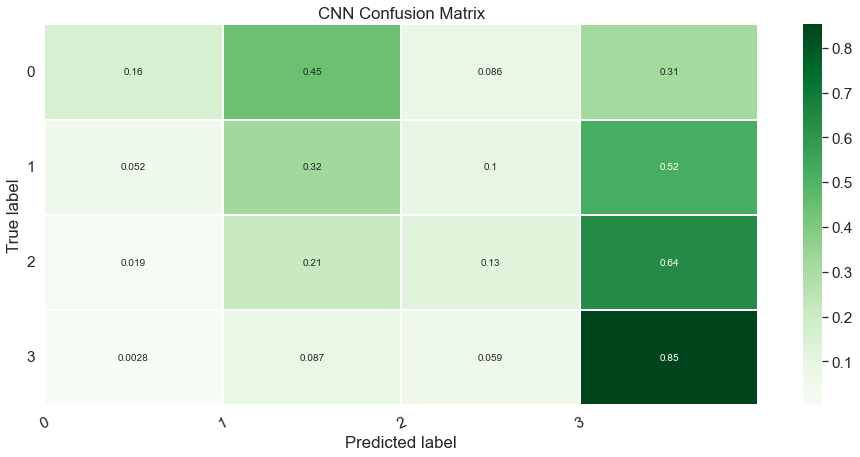

In [109]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('CNN Confusion Matrix')
plt.show()

### CNN3

In [112]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(49,1)))
model.add(Conv1D(5, 5, activation="relu", input_shape=(49,1)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation = 'softmax'))

opt = Adam(lr = 0.001, decay = 1e-5) 
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2585 - accuracy: 0.4267
Epoch 2/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2188 - accuracy: 0.4455
Epoch 3/10
546/546 [==============================] - 3s 6ms/step - loss: 1.2092 - accuracy: 0.4492
Epoch 4/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2031 - accuracy: 0.4508
Epoch 5/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1993 - accuracy: 0.4562
Epoch 6/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1949 - accuracy: 0.4575
Epoch 7/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1935 - accuracy: 0.4598
Epoch 8/10
546/546 [==============================] - 3s 6ms/step - loss: 1.1903 - accuracy: 0.4610
Epoch 9/10
546/546 [==============================] - 3s 6ms/step - loss: 1.1862 - accuracy: 0.4624
Epoch 10/10
546/546 [==============================] - 3s 6ms/step - loss: 1.1846 - accuracy: 0.4637

In [113]:
val_loss, val_acc = model.evaluate(X_test_cnn, y_test)

137/137 [==============================] - 1s 3ms/step - loss: 1.1932 - accuracy: 0.4516


In [114]:
y_pred = model.predict(X_test_cnn)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.49      0.12      0.19       572
           1       0.32      0.35      0.34      1007
           2       0.31      0.05      0.09      1029
           3       0.51      0.85      0.64      1756

    accuracy                           0.45      4364
   macro avg       0.41      0.34      0.31      4364
weighted avg       0.42      0.45      0.38      4364



### CNN4

In [78]:
model = Sequential()
model.add(Conv1D(16, 2, padding = 'causal', activation="relu", input_shape=(49,1)))
model.add(MaxPooling1D(pool_size=3,strides=3))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation = 'softmax'))

opt = Adam(lr = 0.01, decay = 1e-5) 
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
546/546 [==============================] - 4s 4ms/step - loss: 1.2486 - accuracy: 0.4309
Epoch 2/10
546/546 [==============================] - 6s 10ms/step - loss: 1.2251 - accuracy: 0.4481
Epoch 3/10
546/546 [==============================] - 6s 12ms/step - loss: 1.2171 - accuracy: 0.4474
Epoch 4/10
546/546 [==============================] - 6s 12ms/step - loss: 1.2091 - accuracy: 0.4520
Epoch 5/10
546/546 [==============================] - 10s 18ms/step - loss: 1.2021 - accuracy: 0.4543
Epoch 6/10
546/546 [==============================] - 11s 20ms/step - loss: 1.1978 - accuracy: 0.4570
Epoch 7/10
546/546 [==============================] - 9s 16ms/step - loss: 1.1977 - accuracy: 0.4567
Epoch 8/10
546/546 [==============================] - 6s 11ms/step - loss: 1.1951 - accuracy: 0.4583
Epoch 9/10
546/546 [==============================] - 7s 13ms/step - loss: 1.1955 - accuracy: 0.4577
Epoch 10/10
546/546 [==============================] - 8s 15ms/step - loss: 1.1888 - accur

In [79]:
val_loss, val_acc = model.evaluate(X_test_cnn, y_test)

137/137 [==============================] - 1s 4ms/step - loss: 1.1977 - accuracy: 0.4528


In [80]:
y_pred = model.predict(X_test_cnn)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.44      0.24      0.31       572
           1       0.31      0.39      0.34      1007
           2       0.33      0.07      0.11      1029
           3       0.53      0.79      0.64      1756

    accuracy                           0.45      4364
   macro avg       0.41      0.37      0.35      4364
weighted avg       0.42      0.45      0.40      4364

